In [1]:
import os 
os.getcwd()
print(os.getcwd())
## 获取当前工作目录

import pandas as pd
from pandas import DataFrame   #数据框的简写，本书采用的是该格式，直接使用DataFrame即可
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#pd.set_option('display.max_rows', None) #显示所有数据行 
pd.set_option('display.max_rows',10)     #共显示10行数据
pd.set_option('display.max_columns',None)# 设置查看列不省略
pd.set_option('display.precision',2)#设置后四位
pd.options.display.float_format='{:.2f}'.format # 全局设置二位小数

'c:\\Users\\cqm\\Desktop\\多元统计陈麒名'

c:\Users\cqm\Desktop\多元统计陈麒名


* demo1——标普500数据主成分降维后，主成分回归分析

数据清洗，缺失值使用后一日的收盘价填充，整列缺失值或大量缺失值则删除。

In [ ]:
#爬取标普500数据，12-2至12-10分钟级收盘价数据，创建demo数据库
import datetime as dt
import yfinance as yf

def get_data_tocsv(url=r'.\sp500tickers.xlsx'):
    msft = yf.Ticker('SPY')
    hist = msft.history(start="2024-12-2", end="2024-12-10", interval="1m")
    lie_all=hist['Close'].rename('SPY',inplace=True)
    df = pd.read_excel(url)
    for i in df.iloc[:,0]:
        msft=yf.Ticker(i)
        hist=msft.history(start="2024-12-2", end="2024-12-10", interval="1m")
        lie=hist['Close'].rename(i,inplace=True)
        lie_all=pd.concat([lie_all,lie],axis=1)
    lie_all.to_csv('sp500_data.csv')
    return lie_all
    
get_data_tocsv()

In [3]:
from sklearn.preprocessing import StandardScaler
data_origin=pd.read_csv(r'.\sp500_data.csv')
data_origin.rename(columns={data_origin.columns[0]: 'time'}, inplace=True)
data_origin.set_index(data_origin.columns[0], inplace=True)#设置时间为索引
data_origin.info()
#需要剔除的列 AZO,BKNG,NVR,POOL,BF.B,TPL,AIZ,BRK.B,CINF,ERIE,FDS,EG,MTD,BR,HUBB,JBHT,NDSN,SNA,GWW,FICO,TYL
need_to_drop=['AZO','BKNG','NVR','POOL','BF.B','TPL','AIZ','BRK.B','CINF','ERIE','FDS','EG','MTD','BR','HUBB','JBHT','NDSN','SNA','GWW','FICO','TYL']
data=data_origin.drop(need_to_drop,axis=1).bfill()#删除列和填充缺失值
missing_values = data.isnull().sum().sum()#查看是否还有缺失值
print(missing_values)
scaler = StandardScaler()#标准化
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data.head()#查看数据
y_data = data['SPY'] #分开自变量和因变量
x_data = data.drop('SPY', axis=1)
x_data.shape

<class 'pandas.core.frame.DataFrame'>
Index: 2340 entries, 2024-12-02 09:30:00-05:00 to 2024-12-09 15:59:00-05:00
Columns: 504 entries, SPY to XEL
dtypes: float64(504)
memory usage: 9.0+ MB
0


,SPY,GOOGL,GOOG,T,CHTR,CMCSA,EA,FOXA,FOX,IPG,LYV,MTCH,META,NFLX,NWSA,NWS,OMC,PARA,TMUS,TTWO,VZ,DIS,WBD,ABNB,AMZN,APTV,BBY,BWA,CZR,KMX,CCL,CMG,DHI,DRI,DECK,DPZ,EBAY,EXPE,F,GRMN,GM,GPC,HAS,HLT,HD,LVS,LEN,LKQ,LOW,LULU,MAR,MCD,MGM,MHK,NKE,NCLH,ORLY,PHM,RL,ROST,RCL,SBUX,TPR,TSLA,TJX,TSCO,ULTA,WYNN,YUM,MO,ADM,BG,CPB,CHD,CLX,KO,CL,CAG,STZ,COST,DG,DLTR,EL,GIS,HSY,HRL,SJM,K,KVUE,KDP,KMB,KHC,KR,LW,MKC,TAP,MDLZ,MNST,PEP,PM,PG,SYY,TGT,TSN,WBA,WMT,APA,BKR,CVX,COP,CTRA,DVN,FANG,EOG,EQT,XOM,HAL,HES,KMI,MPC,OXY,OKE,PSX,SLB,TRGP,VLO,WMB,AFL,ALL,AXP,AIG,AMP,AON,ACGL,AJG,BAC,BLK,BX,BK,BRO,COF,CBOE,SCHW,CB,C,CFG,CME,CPAY,DFS,FIS,FITB,FI,BEN,GPN,GL,GS,HIG,HBAN,ICE,IVZ,JKHY,JPM,KEY,KKR,L,MTB,MKTX,MMC,MA,MET,MCO,MS,MSCI,NDAQ,NTRS,PYPL,PNC,PFG,PGR,PRU,RJF,RF,SPGI,STT,SYF,TROW,TRV,TFC,USB,V,WRB,WFC,WTW,ABT,ABBV,A,ALGN,AMGN,BAX,BDX,TECH,BIIB,BSX,BMY,CAH,CTLT,COR,CNC,CRL,CI,COO,CVS,DHR,DVA,DXCM,EW,ELV,GEHC,GILD,HCA,HSIC,HOLX,HUM,IDXX,INCY,PODD,ISRG,IQV,JNJ,LH,LLY,MCK,MDT,MRK,MRNA,MOH,PFE,DGX,REGN,RMD,RVTY,SOLV,STE,SYK,TFX,TMO,UNH,UHS,VRTX,VTRS,WAT,WST,ZBH,ZTS,MMM,AOS,ALLE,AMTM,AME,ADP,AXON,BA,BLDR,CHRW,CARR,CAT,CTAS,CPRT,CSX,CMI,DAY,DE,DAL,DOV,ETN,EMR,EFX,EXPD,FAST,FDX,FTV,GE,GEV,GNRC,GD,HON,HWM,HII,IEX,ITW,IR,J,JCI,LHX,LDOS,LMT,MAS,NSC,NOC,ODFL,OTIS,PCAR,PH,PAYX,PAYC,PNR,PWR,RSG,ROK,ROL,RTX,LUV,SWK,TXT,TT,TDG,UBER,UNP,UAL,UPS,URI,VLTO,VRSK,WAB,WM,XYL,ACN,ADBE,AMD,AKAM,APH,ADI,ANSS,AAPL,AMAT,ANET,ADSK,AVGO,CDNS,CDW,CSCO,CTSH,GLW,CRWD,DELL,ENPH,EPAM,FFIV,FSLR,FTNT,IT,GEN,GDDY,HPE,HPQ,IBM,INTC,INTU,JBL,JNPR,KEYS,KLAC,LRCX,MCHP,MU,MSFT,MPWR,MSI,NTAP,NVDA,NXPI,ON,ORCL,PLTR,PANW,PTC,QRVO,QCOM,ROP,CRM,STX,NOW,SWKS,SMCI,SNPS,TEL,TDY,TER,TXN,TRMB,VRSN,WDC,ZBRA,APD,ALB,AMCR,AVY,BALL,CE,CF,CTVA,DOW,DD,EMN,ECL,FMC,FCX,IFF,IP,LIN,LYB,MLM,MOS,NEM,NUE,PKG,PPG,SHW,SW,STLD,VMC,ARE,AMT,AVB,BXP,CPT,CBRE,CSGP,CCI,DLR,EQIX,EQR,ESS,EXR,FRT,DOC,HST,INVH,IRM,KIM,MAA,PLD,PSA,O,REG,SBAC,SPG,UDR,VTR,VICI,WELL,WY,AES,LNT,AEE,AEP,AWK,ATO,CNP,CMS,ED,CEG,D,DTE,DUK,EIX,ETR,EVRG,ES,EXC,FE,NEE,NI,NRG,PCG,PNW,PPL,PEG,SRE,SO,VST,WEC,XEL
0,-1.22,-2.68,-2.64,-1.22,-0.07,0.53,-2.11,2.24,2.24,0.80,1.09,-1.10,-3.01,-2.19,-1.40,-2.09,0.78,-0.81,1.11,-0.43,1.90,2.33,-1.53,-0.91,-1.37,-1.39,0.74,0.19,0.79,-0.53,-1.59,-1.00,1.79,2.78,-1.57,3.02,-0.51,-1.35,2.50,-0.77,2.20,0.89,-0.39,0.11,0.42,-1.26,1.65,-0.41,0.39,-1.15,0.01,-0.92,1.81,2.07,-0.52,0.06,-0.45,1.56,-0.95,-0.76,-0.47,1.64,-1.09,-0.82,0.64,-0.55,-1.24,-0.09,0.45,1.70,1.66,1.52,1.42,1.83,-0.49,1.85,1.53,-0.97,0.67,-1.92,-1.64,-1.58,-1.97,0.06,-0.56,0.07,0.60,1.61,1.72,-0.20,1.60,1.25,1.19,-1.39,0.28,1.12,1.25,1.33,1.89,1.47,1.53,-1.74,0.04,1.24,0.82,-1.22,1.45,1.91,1.63,2.97,2.60,1.76,1.68,2.54,1.65,1.56,1.52,1.41,2.22,1.19,1.56,2.53,0.97,1.47,2.90,1.33,2.89,3.17,2.56,2.33,2.47,2.74,1.99,2.01,1.69,2.79,-0.52,4.31,1.87,1.42,4.95,1.29,2.55,1.38,-1.06,3.28,-0.45,1.72,4.92,1.30,2.32,1.80,0.95,1.33,2.11,3.12,1.87,2.66,4.34,0.66,2.17,3.32,3.66,2.48,1.98,2.55,1.19,1.26,2.37,2.29,2.37,2.24,-1.13,2.87,2.32,-0.46,3.04,2.21,1.66,2.17,2.50,3.00,0.97,0.74,0.93,-0.56,1.69,2.65,3.09,1.96,2.54,3.58,-0.52,2.98,1.43,-0.94,-0.64,1.96,1.29,0.03,0.24,-0.07,0.62,0.67,-0.17,-2.96,1.09,1.40,0.47,1.19,0.88,1.30,0.90,2.06,-1.11,-1.14,0.97,0.77,-0.06,0.75,1.61,1.98,1.78,-1.15,0.38,-0.14,-0.04,-0.60,1.61,1.13,-1.31,1.26,1.32,-0.71,-0.16,-0.80,0.54,1.39,-1.04,1.80,-0.50,1.11,1.43,1.66,1.42,0.10,0.96,1.55,0.72,1.17,-0.73,2.36,1.43,-0.95,1.03,1.72,1.61,1.36,0.68,1.38,-0.87,-0.23,1.59,-0.77,2.32,2.91,0.88,2.22,1.62,-0.96,-0.10,1.45,-0.04,2.81,1.63,0.40,0.07,0.67,2.04,2.92,1.49,0.99,-0.26,1.93,2.95,3.02,0.12,2.67,0.84,2.36,1.04,1.99,0.91,1.83,1.36,2.64,-0.94,1.87,1.58,1.67,2.41,0.03,2.03,1.18,-0.25,1.90,1.67,2.24,-0.31,2.09,2.77,-1.95,1.72,1.34,0.68,-0.53,0.78,3.07,-0.67,2.78,0.65,2.31,1.60,-0.62,1.72,-0.75,0.88,-1.36,-0.52,-3.58,-1.88,-0.29,0.25,-1.96,-0.36,-1.68,-2.10,-1.64,-1.14,-2.14,-0.59,-0.94,-0.90,-1.98,0.56,-0.63,0.20,-1.60,0.76,-0.87,0.19,-1.09,-0.92,-1.03,-2.12,-1.24,2.09,-1.14,1.21,-0.49,-2.05,-1.03,-2.52,1.23,-2.43,-2.59,-1.62,0.85,-1.79,-1.07,0.81,0.95,-

(2340, 482)

In [4]:
from scipy.stats import pearsonr, spearmanr, kendalltau
from xicor.xicor import Xi
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
from scipy.stats import pearsonr, spearmanr, kendalltau
from xicor.xicor import Xi

* 模拟实验1 不同分布随机变量的度量情况

In [5]:
def comparison_xicor_difference_pdf(calculation ,title_name='各种分布假定下的xicor系数对sin函数的衡量',gap=5,n=50):
    beta=[];binomial=[];chisquare=[];exponential=[];f=[];gamma=[]
    geometric=[];gumbel=[];laplace=[];logistic =[];lognormal =[];
    negative_binomial=[];noncentral_chisquare=[];noncentral_f=[];
    norm=[];pareto=[];t=[];uniform=[];weibull=[];
    for i in [gap*a for a in range(n)]:
        x_beta=np.random.beta(a=2,b=2,size=i+2)
        x_binomial=np.random.binomial(n=10,p=0.5,size=i+2)
        x_chisquare=np.random.chisquare(df=5,size=i+2)
        x_exponential=np.random.exponential(scale=1,size=i+2)
        x_f=np.random.f(dfnum=2, dfden=2,size=i+2)
        x_gamma=np.random.gamma(shape=5,scale=1,size=i+2)
        x_geometric=np.random.geometric(p=0.5,size=i+2)
        x_gumbel=np.random.gumbel(loc=0,scale=1,size=i+2)
        x_laplace=np.random.laplace(loc=0,scale=1,size=i+2)
        x_logistic=np.random.logistic(loc=0,scale=1,size=i+2)
        x_lognormal=np.random.lognormal(mean=0,sigma=1,size=i+2)
        x_negative_binomial=np.random.negative_binomial(n=5,p=0.5,size=i+2)
        x_noncentral_chisquare=np.random.noncentral_chisquare(df=5,nonc=5,size=i+2)
        x_noncentral_f=np.random.noncentral_f(dfnum=5,dfden=5,nonc=5,size=i+2)
        x_norm=np.random.normal(loc=0,scale=1,size=i+2)
        x_pareto=np.random.pareto(a=5,size=i+2)
        x_t=np.random.standard_t(df=5,size=i+2)
        x_uniform=np.random.uniform(low=0,high=1,size=i+2)
        x_weibull=np.random.weibull(a=5,size=i+2)
        y_beta=calculation(x_beta)
        y_binomial=calculation(x_binomial)
        y_chisquare=calculation(x_chisquare)
        y_exponential=calculation(x_exponential)
        y_f=calculation(x_f)
        y_gamma=calculation(x_gamma)
        y_geometric=calculation(x_geometric)
        y_gumbel=calculation(x_gumbel)
        y_laplace=calculation(x_laplace)
        y_logistic=calculation(x_logistic)
        y_lognormal=calculation(x_lognormal)
        y_negative_binomial=calculation(x_negative_binomial)
        y_noncentral_chisquare=calculation(x_noncentral_chisquare)
        y_noncentral_f=calculation(x_noncentral_f)
        y_norm=calculation(x_norm)
        y_pareto=calculation(x_pareto)
        y_t=calculation(x_t)
        y_uniform=calculation(x_uniform)
        y_weibull=calculation(x_weibull)
        beta.append(max(Xi(list(x_beta),list(y_beta)).correlation,Xi(list(y_beta),list(x_beta)).correlation))
        binomial.append(max(Xi(list(x_binomial),list(y_binomial)).correlation,Xi(list(y_binomial),list(x_binomial)).correlation))
        chisquare.append(max(Xi(list(x_chisquare),list(y_chisquare)).correlation,Xi(list(y_chisquare),list(x_chisquare)).correlation))
        exponential.append(max(Xi(list(x_exponential),list(y_exponential)).correlation,Xi(list(y_exponential),list(x_exponential)).correlation))
        f.append(max(Xi(list(x_f),list(y_f)).correlation,Xi(list(y_f),list(x_f)).correlation))
        gamma.append(max(Xi(list(x_gamma),list(y_gamma)).correlation,Xi(list(y_gamma),list(x_gamma)).correlation))
        geometric.append(max(Xi(list(x_geometric),list(y_geometric)).correlation,Xi(list(y_geometric),list(x_geometric)).correlation))
        gumbel.append(max(Xi(list(x_gumbel),list(y_gumbel)).correlation,Xi(list(y_gumbel),list(x_gumbel)).correlation))
        laplace.append(max(Xi(list(x_laplace),list(y_laplace)).correlation,Xi(list(y_laplace),list(x_laplace)).correlation))
        logistic.append(max(Xi(list(x_logistic),list(y_logistic)).correlation,Xi(list(y_logistic),list(x_logistic)).correlation))
        lognormal.append(max(Xi(list(x_lognormal),list(y_lognormal)).correlation,Xi(list(y_lognormal),list(x_lognormal)).correlation))
        negative_binomial.append(max(Xi(list(x_negative_binomial),list(y_negative_binomial)).correlation,Xi(list(y_negative_binomial),list(x_negative_binomial)).correlation))
        noncentral_chisquare.append(max(Xi(list(x_noncentral_chisquare),list(y_noncentral_chisquare)).correlation,Xi(list(y_noncentral_chisquare),list(x_noncentral_chisquare)).correlation))
        noncentral_f.append(max(Xi(list(x_noncentral_f),list(y_noncentral_f)).correlation,Xi(list(y_noncentral_f),list(x_noncentral_f)).correlation))
        norm.append(max(Xi(list(x_norm),list(y_norm)).correlation,Xi(list(y_norm),list(x_norm)).correlation))
        pareto.append(max(Xi(list(x_pareto),list(y_pareto)).correlation,Xi(list(y_pareto),list(x_pareto)).correlation))
        t.append(max(Xi(list(x_t),list(y_t)).correlation,Xi(list(y_t),list(x_t)).correlation))
        uniform.append(max(Xi(list(x_uniform),list(y_uniform)).correlation,Xi(list(y_uniform),list(x_uniform)).correlation))
        weibull.append(max(Xi(list(x_weibull),list(y_weibull)).correlation,Xi(list(y_weibull),list(x_weibull)).correlation))

        
        
    
    plt.figure()
    plt.plot(range(n), beta, marker=None, label='beta')
    plt.plot(range(n), binomial, marker=None, label='binomial')
    plt.plot(range(n), chisquare, marker=None, label='chisquare')
    plt.plot(range(n), exponential, marker=None, label='exponential')
    plt.plot(range(n), f, marker=None, label='f')
    plt.plot(range(n), gamma, marker=None, label='gamma')
    plt.plot(range(n), geometric, marker=None, label='geometric')
    plt.plot(range(n), gumbel, marker=None, label='gumbel')
    plt.plot(range(n), laplace, marker=None, label='laplace')
    plt.plot(range(n), logistic, marker=None, label='logistic')
    plt.plot(range(n), lognormal, marker=None, label='lognormal')
    plt.plot(range(n), negative_binomial, marker=None, label='negative_binomial')
    plt.plot(range(n), noncentral_chisquare, marker=None, label='noncentral_chisquare')
    plt.plot(range(n), noncentral_f, marker=None, label='noncentral_f')
    plt.plot(range(n), norm, marker=None, label='norm')
    plt.plot(range(n), pareto, marker=None, label='pareto')
    plt.plot(range(n), t, marker=None, label='t')
    plt.plot(range(n), uniform, marker=None, label='uniform')
    plt.plot(range(n), weibull, marker=None, label='weibull')
    plt.title(title_name);plt.xlabel('样本数/{}'.format(gap));plt.ylabel('rho_Value');plt.grid(False)
    # 显示图例,网格（可选）
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()    
        
        
        
    
    

c:\anaconda\envs\pytorch\lib\site-packages\xicor\xicor.py:81: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.mean_absolute / self.inverse_g_mean


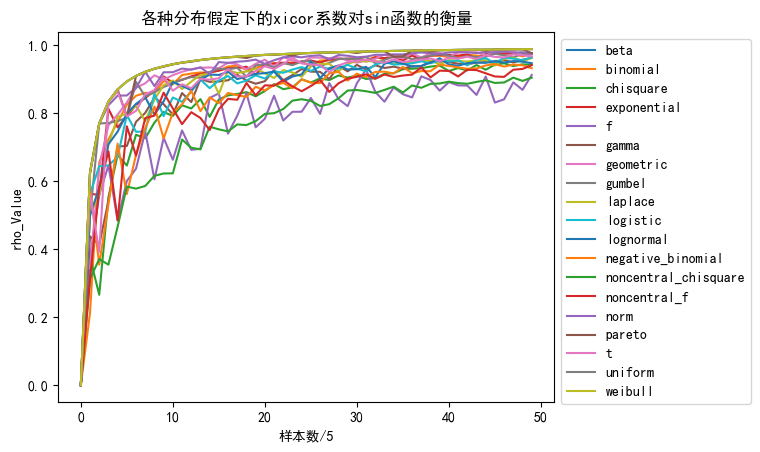

In [6]:
comparison_xicor_difference_pdf(lambda x: np.sin(x),n=50)

In [6]:
# #R语言的RDC 函数
# rdc <- function(x,y,k,s) {
#   x  <- cbind(apply(as.matrix(x),2,function(u) ecdf(u)(u)),1)
#   y  <- cbind(apply(as.matrix(y),2,function(u) ecdf(u)(u)),1)
#   wx <- matrix(rnorm(ncol(x)*k,0,s),ncol(x),k)
#   wy <- matrix(rnorm(ncol(y)*k,0,s),ncol(y),k)
#   cancor(cbind(cos(x%*%wx),sin(x%*%wx)), cbind(cos(y%*%wy),sin(y%*%wy)))$cor[1]
# }
# x <- matrix(c(1, 2, 3, 4), nrow = 2, byrow = TRUE)
# y <- matrix(c(5, 6, 7, 8), nrow = 2, byrow = TRUE)
# result <- rdc(x, y, k = 5, s = 1)
# cat(sprintf("%.7f\n", result))
#随机相依系数函数实现
from scipy.stats import rankdata
from scipy.linalg import svd

def rdc(x, y, k, s):
    # Convert to numpy arrays if they are not already
    x = np.array(x)
    y = np.array(y)
    
    # Apply ECDF to each column of x and y
    x_ecdf = np.apply_along_axis(lambda u: rankdata(u, method='max') / len(u), axis=0, arr=x)
    y_ecdf = np.apply_along_axis(lambda u: rankdata(u, method='max') / len(u), axis=0, arr=y)
    
    # Add a column of ones
    x = np.c_[x_ecdf, np.ones(x.shape[0])]
    y = np.c_[y_ecdf, np.ones(y.shape[0])]
    
    # Generate random matrices wx and wy
    wx = np.random.normal(0, s, (x.shape[1], k))
    wy = np.random.normal(0, s, (y.shape[1], k))
    
    # Compute the projections
    x_proj = np.cos(np.dot(x, wx)) + 1j * np.sin(np.dot(x, wx))
    y_proj = np.cos(np.dot(y, wy)) + 1j * np.sin(np.dot(y, wy))
    
    # Compute the canonical correlation
    Ux, Sx, Vx = svd(x_proj, full_matrices=False)
    Uy, Sy, Vy = svd(y_proj, full_matrices=False)
    
    # Compute the correlation matrix
    cor_matrix = np.dot(Ux.T, Uy)
    
    # Return the first canonical correlation coefficient
    return np.abs(cor_matrix).max()

# Example usage:
x = [[1, 2], [3, 4]]
y = [[5, 6], [7, 8]]
print(rdc(x, y, k=5, s=0))

1.0


* 模拟实验2

In [7]:
#衡量交互效应
def interaction_effect_three(pdf_type='difference',choose='x1',gap=5,min_=0,max_=100,n=50):
    x1_112=[];x1_113=[];x1_122=[];x1_133=[];x1_123=[];
    x2_112=[];x2_122=[];x2_123=[];x2_223=[];x2_233=[];
    x3_113=[];x3_123=[];x3_133=[];x3_223=[];x3_233=[];
    for i in [gap*a for a in range(n)]:
        if pdf_type=='difference':
            x1=np.linspace(min_,max_,i+2) #生成i+2个数据点
            x2=np.random.randint(min_,max_,i+2)
            x3=np.random.binomial(int(max_),0.5,i+2)
        elif pdf_type=='Bernoulli':
            x1=np.random.binomial(1,0.5,i+2) #生成i+2个数据点
            x2=np.random.binomial(1,0.5,i+2)
            x3=np.random.binomial(1,0.5,i+2)
        elif pdf_type=='binomial':
            x1=np.random.binomial(int(max_),0.5,i+2)
            x2=np.random.binomial(int(max_),0.5,i+2)
            x3=np.random.binomial(int(max_),0.5,i+2)
            
        x1x1x2=x1*x1*x2;x1x1x3=x1*x1*x3;x1x2x2=x1*x2*x2;x1x3x3=x1*x3*x3;
        x1x2x3=x1*x2*x3;x2x2x3=x2*x2*x3;x2x3x3=x2*x3*x3
        
        if choose=='x1':
            x1_112.append(max(Xi(list(x1),list(x1x1x2)).correlation,Xi(list(x1x1x2),list(x1)).correlation))
            x1_113.append(max(Xi(list(x1),list(x1x1x3)).correlation,Xi(list(x1x1x3),list(x1)).correlation))
            x1_122.append(max(Xi(list(x1),list(x1x2x2)).correlation,Xi(list(x1x2x2),list(x1)).correlation))
            x1_133.append(max(Xi(list(x1),list(x1x3x3)).correlation,Xi(list(x1x3x3),list(x1)).correlation))
            x1_123.append(max(Xi(list(x1),list(x1x2x3)).correlation,Xi(list(x1x2x3),list(x1)).correlation))
            
        if choose=='x2':
            x2_112.append(max(Xi(list(x2),list(x1x1x2)).correlation,Xi(list(x1x1x2),list(x2)).correlation))
            x2_122.append(max(Xi(list(x2),list(x1x2x2)).correlation,Xi(list(x1x2x2),list(x2)).correlation))
            x2_123.append(max(Xi(list(x2),list(x1x2x3)).correlation,Xi(list(x1x2x3),list(x2)).correlation))
            x2_223.append(max(Xi(list(x2),list(x2x2x3)).correlation,Xi(list(x2x2x3),list(x2)).correlation))
            x2_233.append(max(Xi(list(x2),list(x2x3x3)).correlation,Xi(list(x2x3x3),list(x2)).correlation))
         
        if choose=='x3':
            x3_113.append(max(Xi(list(x3),list(x1x1x3)).correlation,Xi(list(x1x1x3),list(x3)).correlation))
            x3_123.append(max(Xi(list(x3),list(x1x2x3)).correlation,Xi(list(x1x2x3),list(x3)).correlation))
            x3_133.append(max(Xi(list(x3),list(x1x3x3)).correlation,Xi(list(x1x3x3),list(x3)).correlation))
            x3_223.append(max(Xi(list(x3),list(x2x2x3)).correlation,Xi(list(x2x2x3),list(x3)).correlation))
            x3_233.append(max(Xi(list(x3),list(x2x3x3)).correlation,Xi(list(x2x3x3),list(x3)).correlation))
           
    if choose=='x1':
        y1=x1_112;y2=x1_113;y3=x1_122;y4=x1_133;y5=x1_123
        label1=r'$\xi \left( x_1,x_1x_1x_2 \right) $'
        label2=r'$\xi \left( x_1,x_1x_1x_3 \right) $'
        label3=r'$\xi \left( x_1,x_1x_2x_2 \right) $'
        label4=r'$\xi \left( x_1,x_1x_3x_3 \right) $'
        label5=r'$\xi \left( x_1,x_1x_2x_3 \right) $'
        
    if choose=='x2':
        y1=x2_112;y2=x2_122;y3=x2_123;y4=x2_223;y5=x2_233
        label1=r'$\xi \left( x_2,x_1x_1x_2 \right) $'
        label2=r'$\xi \left( x_2,x_1x_2x_2 \right) $'
        label3=r'$\xi \left( x_2,x_1x_2x_3 \right) $'
        label4=r'$\xi \left( x_2,x_2x_2x_3 \right) $'
        label5=r'$\xi \left( x_2,x_2x_3x_3 \right) $'
        
    if choose=='x3':
        y1=x3_113;y2=x3_123;y3=x3_133;y4=x3_223;y5=x3_233
        label1=r'$\xi \left( x_3,x_1x_1x_3 \right) $'
        label2=r'$\xi \left( x_3,x_1x_2x_3 \right) $'
        label3=r'$\xi \left( x_3,x_1x_3x_3 \right) $'
        label4=r'$\xi \left( x_3,x_2x_2x_3 \right) $'
        label5=r'$\xi \left( x_3,x_2x_3x_3 \right) $'
        
    plt.figure()
    plt.plot(range(n), y1, marker=None, label=label1)
    plt.plot(range(n), y2, marker=None, label=label2)
    plt.plot(range(n), y3, marker=None, label=label3)
    plt.plot(range(n), y4, marker=None, label=label4)
    plt.plot(range(n), y5, marker=None, label=label5)
    plt.title('{}的交互作用图'.format(choose));plt.xlabel('样本数/{}'.format(gap));plt.ylabel('rho_Value');plt.grid(False)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    

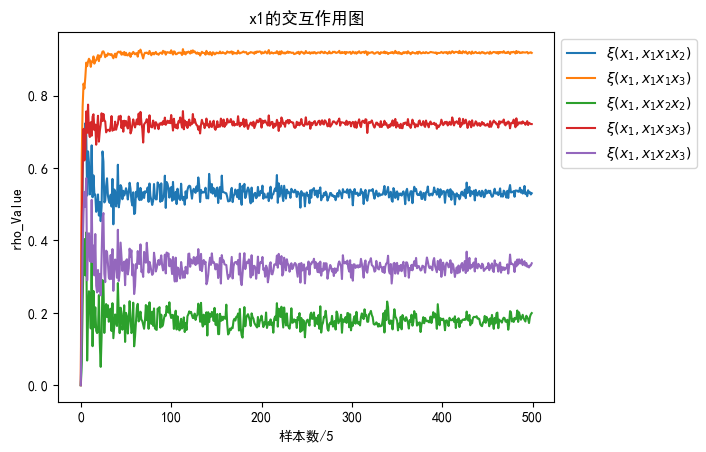

In [8]:
interaction_effect_three(pdf_type='difference',choose='x1',gap=5,min_=0,max_=100,n=500)


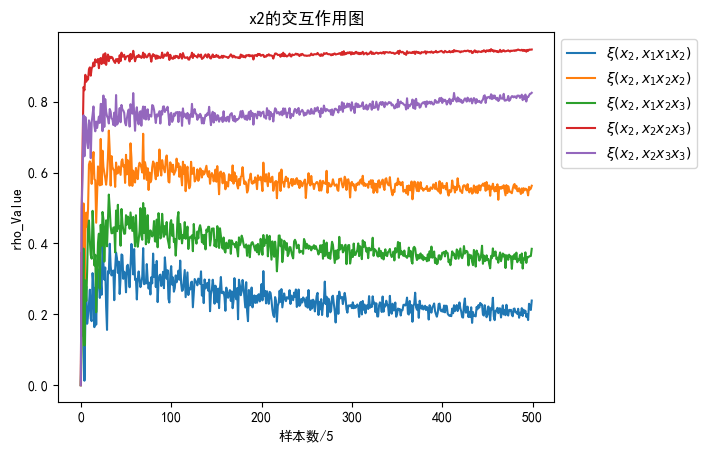

In [9]:
interaction_effect_three(pdf_type='difference',choose='x2',gap=5,min_=0,max_=100,n=500)

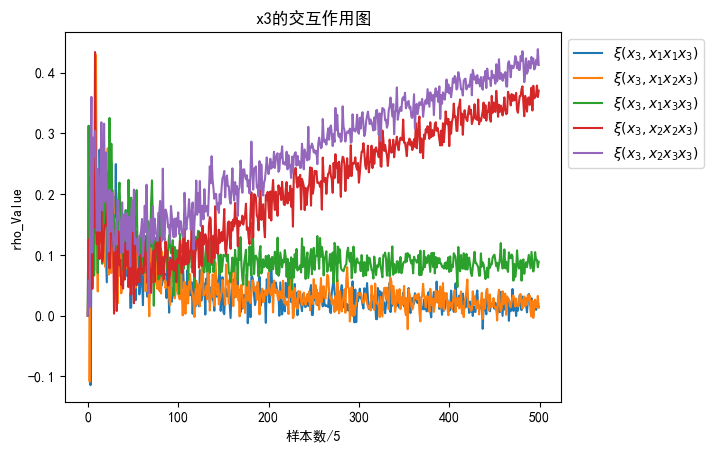

In [10]:
interaction_effect_three(pdf_type='difference',choose='x3',gap=5,min_=0,max_=100,n=500)


c:\anaconda\envs\pytorch\lib\site-packages\xicor\xicor.py:81: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.mean_absolute / self.inverse_g_mean


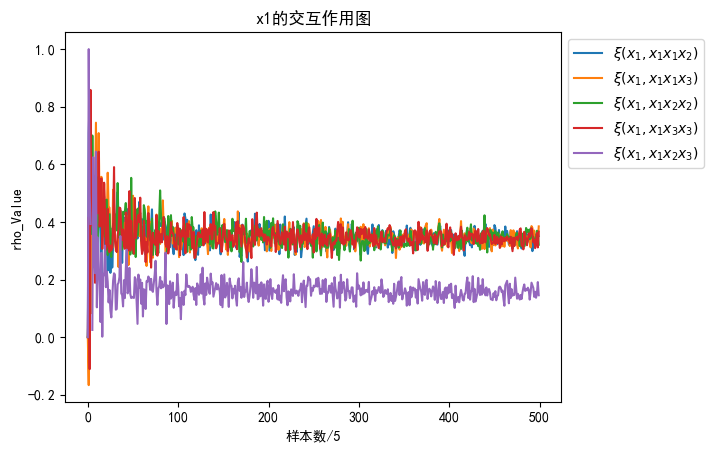

In [11]:
interaction_effect_three(pdf_type='Bernoulli',choose='x1',gap=5,min_=0,max_=100,n=500)


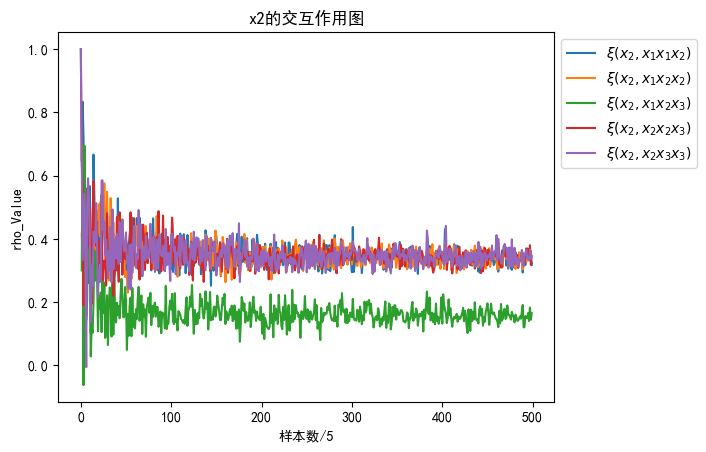

In [12]:
interaction_effect_three(pdf_type='Bernoulli',choose='x2',gap=5,min_=0,max_=100,n=500)


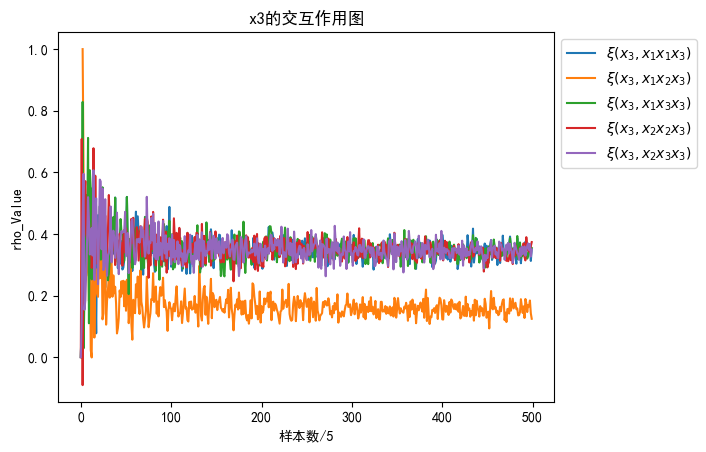

In [13]:
interaction_effect_three(pdf_type='Bernoulli',choose='x3',gap=5,min_=0,max_=100,n=500)


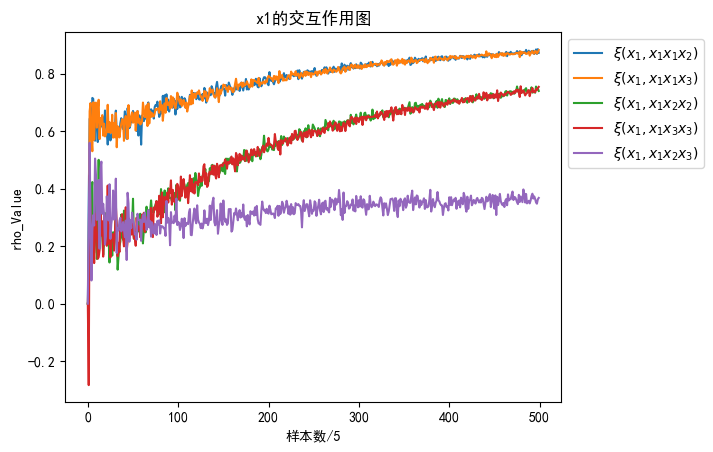

In [14]:
interaction_effect_three(pdf_type='binomial',choose='x1',gap=5,min_=0,max_=100,n=500)


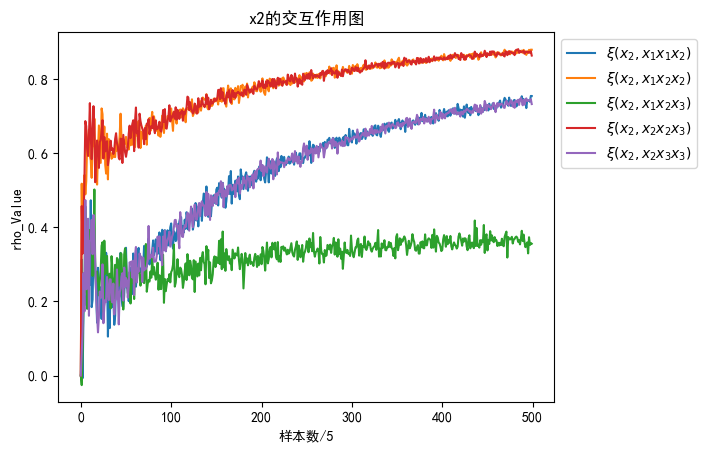

In [15]:
interaction_effect_three(pdf_type='binomial',choose='x2',gap=5,min_=0,max_=100,n=500)


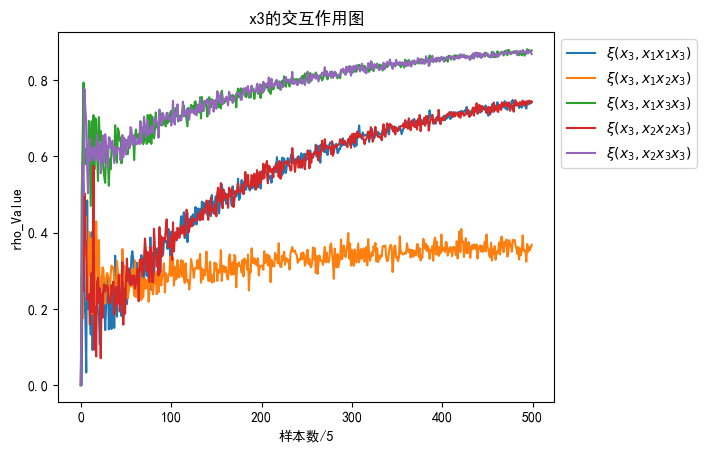

In [16]:
interaction_effect_three(pdf_type='binomial',choose='x3',gap=5,min_=0,max_=100,n=500)

#　模拟实验３

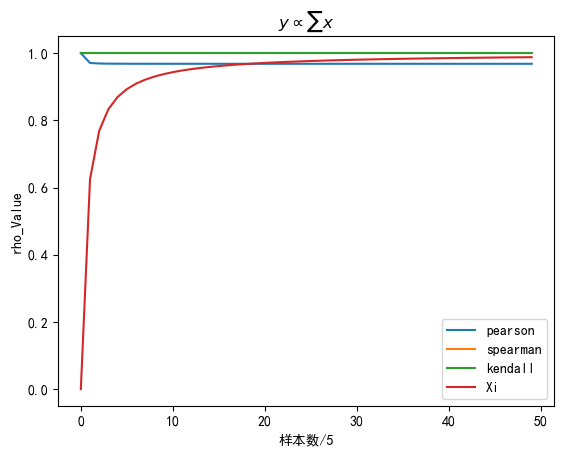

In [17]:
#模拟实验3
def comparison_single_varible(calculation,title_name=None,gap=5,min_=0,max_=100,n=50):
    pearson1=[];spearman1=[];kendall1=[];Xi1=[];rdc1=[];
    for i in [gap*a for a in range(n)]:
        # x1=np.random.normal(0,1,i+2)
        x1=np.linspace(min_,max_,i+2) #生成i+2个数据点
        y1=calculation(x1)
        pearson,pearson_p=pearsonr(x1, y1)
        spearman,spearman_p=spearmanr(x1, y1)
        kendall,kendall_p=kendalltau(x1, y1)
        # rdcr=rdc(x1, y1,5,1)
        Xir=max(Xi(list(x1),list(y1)).correlation,Xi(list(y1),list(x1)).correlation)
        # Xir_p=Xi(list(x1),list(y1)).pval_asymptotic(ties=True)
        pearson1.append(pearson)
        spearman1.append(spearman)
        kendall1.append(kendall)
        # rdc1.append(rdcr)
        Xi1.append(Xir)
        
        
    plt.figure()
    plt.plot(range(n), pearson1, marker=None, label='pearson')# 绘制pearson的折线图,marker='o'or's'
    plt.plot(range(n), spearman1, marker=None, label='spearman')# 绘制spearman数据集的折线图
    plt.plot(range(n), kendall1, marker=None, label='kendall')# 绘制kendall数据集的折线图
    plt.plot(range(n), Xi1, marker=None, label='Xi') # 绘制xicor数据集的折线图
    # plt.plot(range(n), rdc1, marker=None, label='rdc') # 绘制rdc数据集的折线图
    plt.title(title_name);plt.xlabel('样本数/{}'.format(gap));plt.ylabel('rho_Value');plt.legend();plt.grid(False)
    # 显示图例,网格（可选）
    plt.show()
    
    
comparison_single_varible(lambda x:np.cumsum(x),title_name=r'$y\propto \sum{x}$')   #模拟一个自变量为x的函数，y=x1+x2+x3+...+xn


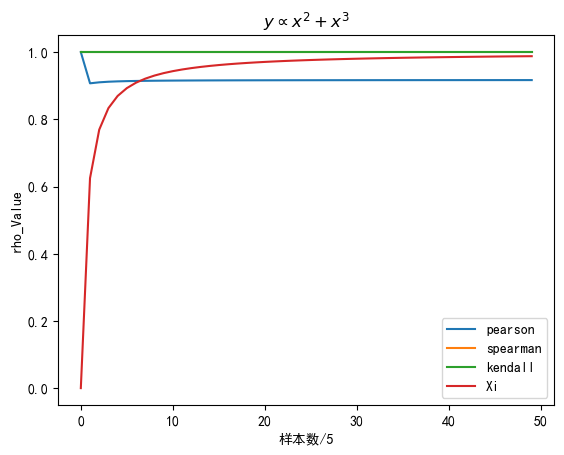

In [18]:
comparison_single_varible(lambda x:pow(x,2)+pow(x,3),title_name=r'$y\propto x^2+x^3$') # y=x^2+x^3


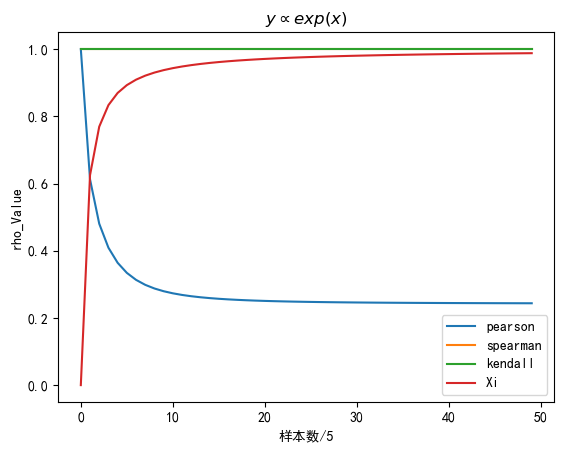

In [19]:
comparison_single_varible(lambda x:np.exp(x),title_name=r'$y\propto exp(x)$') #y=exp(x)


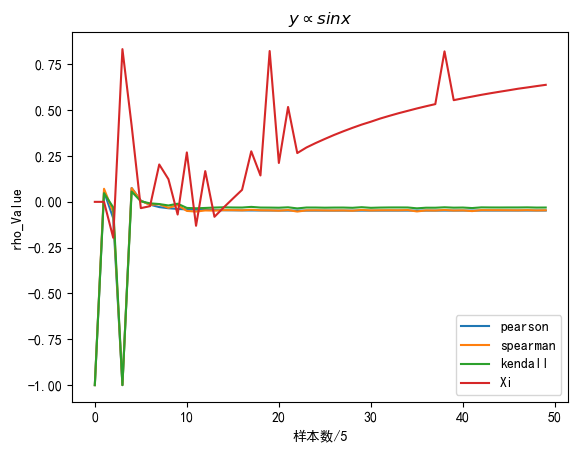

In [20]:
comparison_single_varible(lambda x:np.sin(x),title_name=r'$y\propto sinx$',n=50) #y=sinx 样本量=250


In [21]:
# comparison_single_varible(lambda x:np.sin(x),title_name=r'$y\propto sinx$',n=500) #y=sinx 样本量=2500


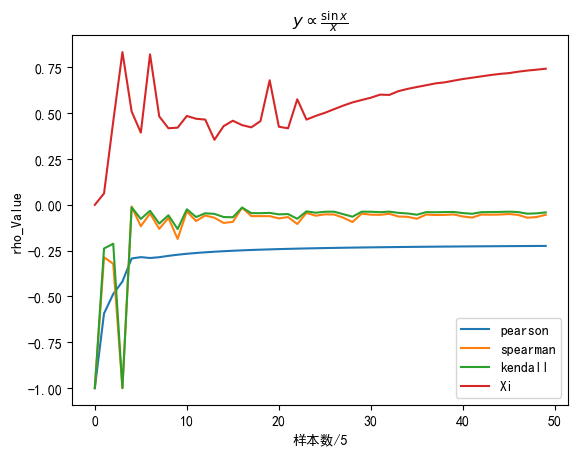

In [22]:
comparison_single_varible(lambda x:np.sin(x)/x,title_name=r'$y\propto \frac{\sin x}{x}$',min_=0.1,n=50) #y=sinx/x 样本量=250


In [23]:
# comparison_single_varible(lambda x:x/np.sin(x),title_name=r'$y\propto \frac{x}{\sin x}$',min_=0.1,max_=100,n=50) #y=x/sinx 样本量=250


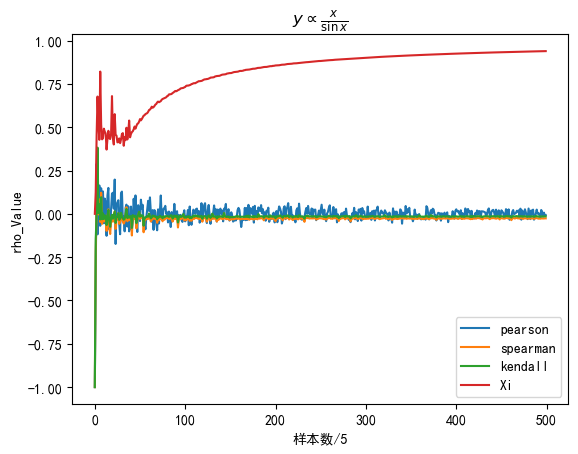

In [24]:
comparison_single_varible(lambda x:x/np.sin(x),title_name=r'$y\propto \frac{x}{\sin x}$',min_=0.1,max_=100,n=500) #y=x/sinx 样本量=2500


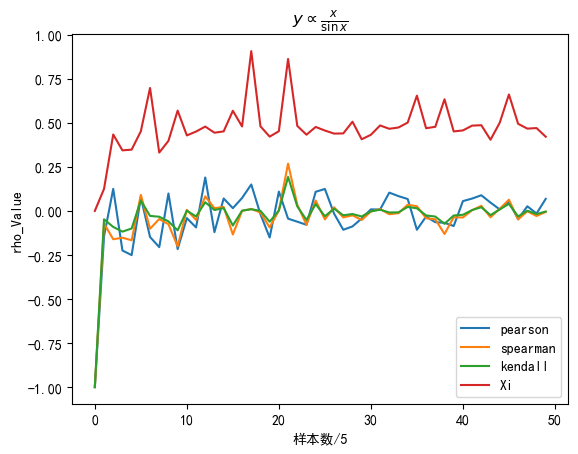

In [25]:
comparison_single_varible(lambda x:x/np.sin(x),title_name=r'$y\propto \frac{x}{\sin x}$',min_=0.1,max_=10000,n=50) #y=x/sinx 样本量=2500


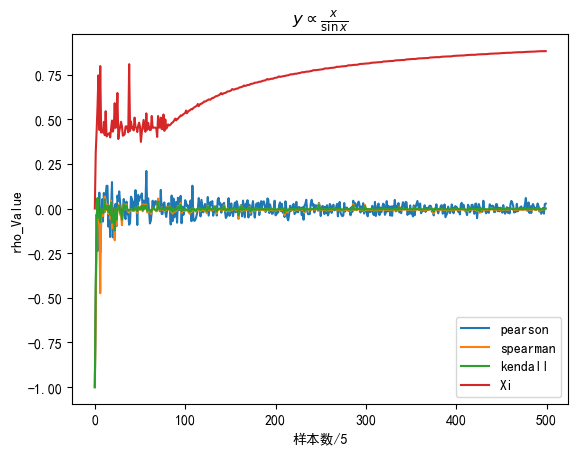

In [26]:
comparison_single_varible(lambda x:x/np.sin(x),title_name=r'$y\propto \frac{x}{\sin x}$',min_=0.1,max_=200,n=500) #y=x/sinx 样本量=2500


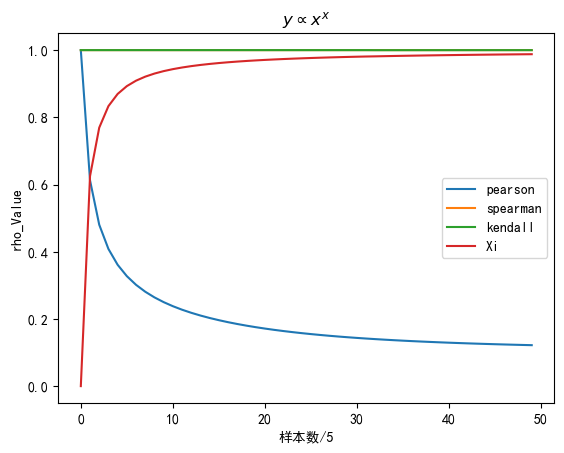

In [27]:
comparison_single_varible(lambda x:pow(x,x),title_name=r'$y\propto x^x$',min_=0.1,n=50) #y=x^x 样本量=250


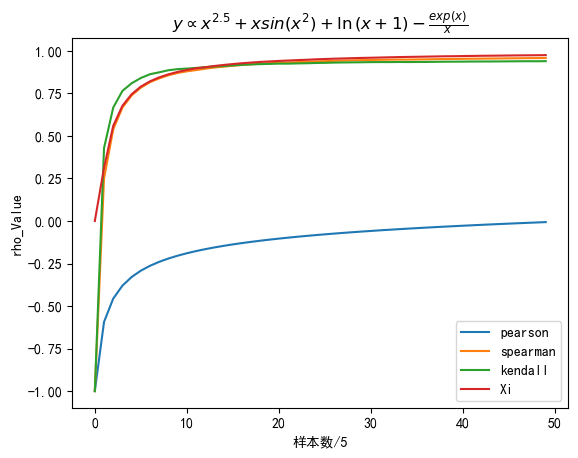

In [28]:
comparison_single_varible(lambda x:(pow(x,2.5)+x*np.sin(x**2)+np.log(x+1)+np.exp(x)/x)/10,min_=0.0001,max_=7,title_name=r'$y\propto x^{2.5}+xsin(x^2)+\ln \left( x+1 \right) -\frac{exp(x)}{x}$',n=50) #y=复杂函数 样本量=250


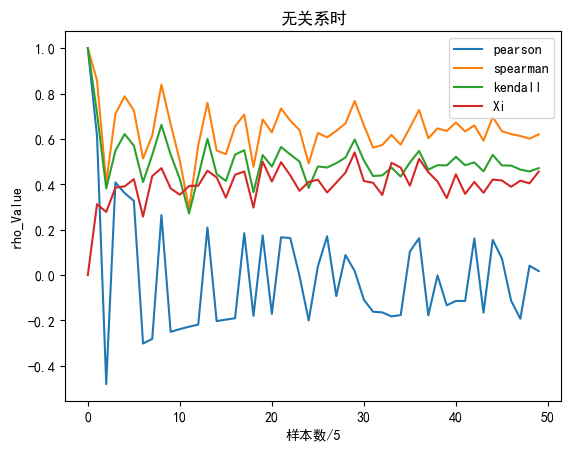

In [29]:
comparison_single_varible(lambda x:np.random.randint(x),title_name='无关系时',min_=0.1,n=50) #无关样本，样本量=250


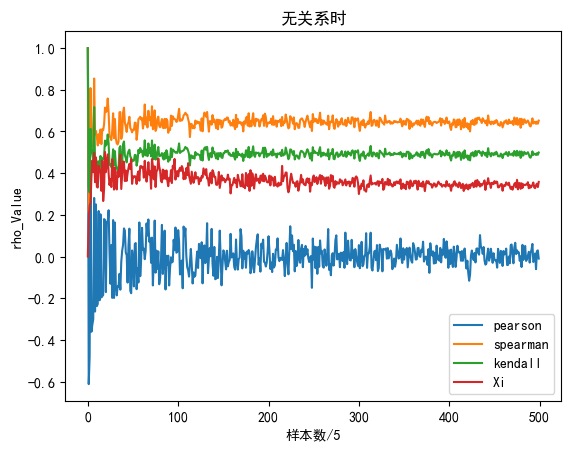

In [30]:
comparison_single_varible(lambda x:np.random.randint(x),title_name='无关系时',min_=0.1,n=500) #无关样本，样本量=2500

In [31]:
#离散随机变量的分段函数情况
def dicrete_cut(x):
    y=[]
    for i in range(len(x)):
        if x[i]<5: y.append(-1)
        elif x[i]<10: y.append(0)
        else: y.append(1)
    return y
#连续随机变量的分段函数情况
def continue_cut(x):
    y=[]
    for i in range(len(x)):
        if x[i]<5:y.append(-1)
        elif x[i]<10: y.append(np.exp(-x[i])+10)
        elif x[i]<15: y.append(np.sin(x[i]))
        else: y.append(3)
    return y


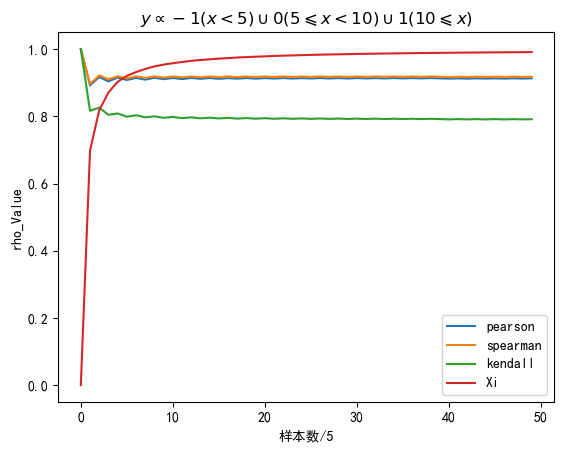

In [32]:
comparison_single_varible(lambda x : dicrete_cut(x),title_name=r'$y\propto -1\left( x<5 \right) \cup 0\left( 5\leqslant x<10 \right) \cup 1\left( 10\leqslant x \right) $',min_=0.1,max_=20,n=50) #离散分段函数，样本量=2500

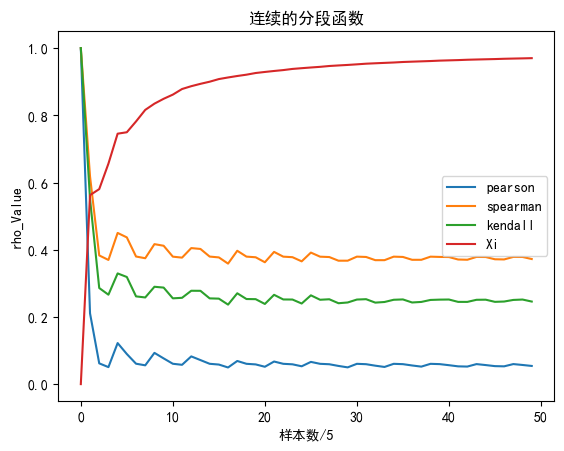

In [33]:
comparison_single_varible(lambda x : continue_cut(x),title_name='连续的分段函数',min_=0.1,max_=20,n=50) #'连续的分段函数'，样本量=250

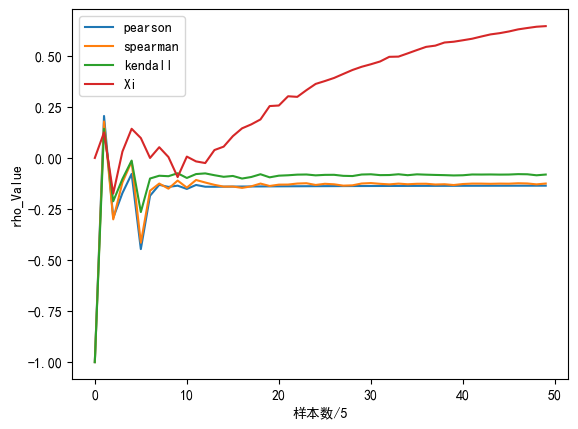

In [34]:
comparison_single_varible(lambda x :np.sin(pow(x,2)+np.sin(x)),title_name='',min_=0,max_=10,n=50) #'连续的分段函数'，样本量=250

# 降维分析 

## <span style="font-size: 24px;"> 主成分分析 </span>

Text(0.5, 1.0, '主成分后的数据')

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

C:\Users\cqm\AppData\Local\Temp\ipykernel_30380\4172377372.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend()


Text(0.5, 1.0, '在原本空间上的主成分')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

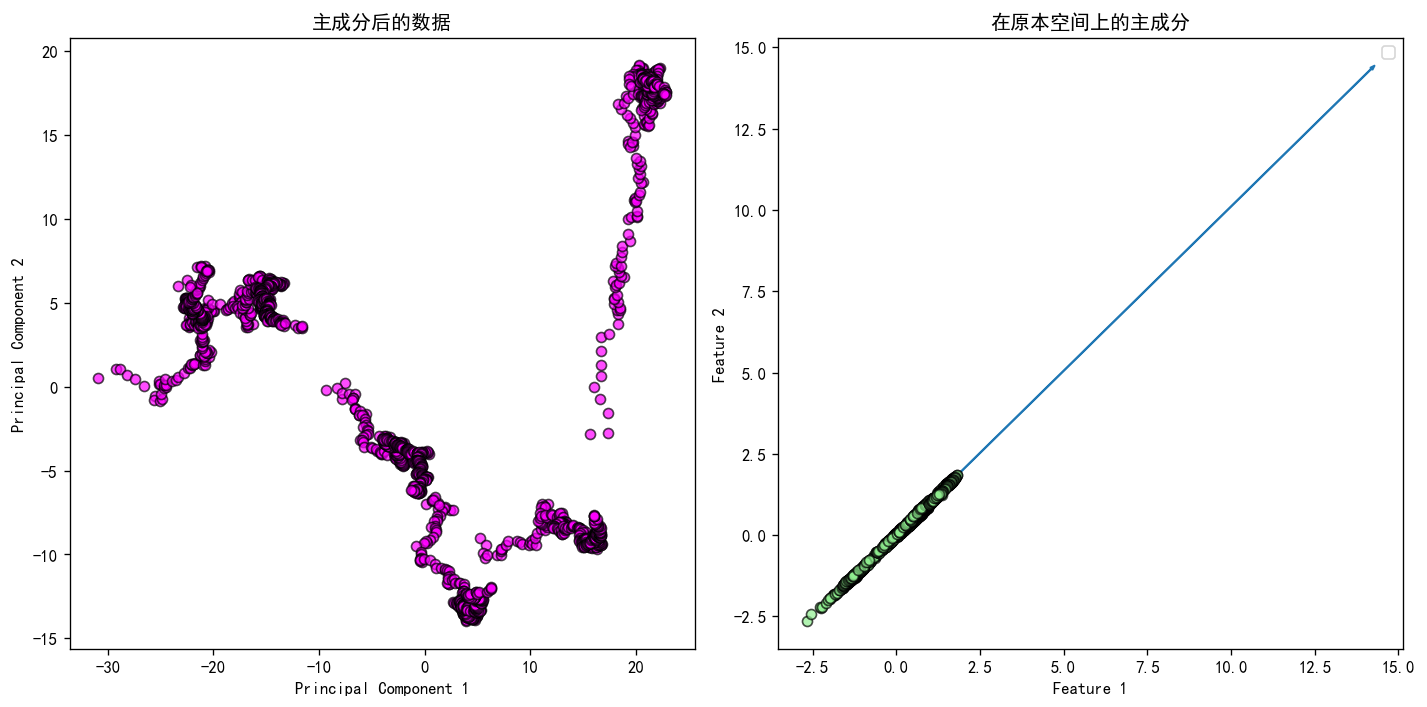

In [191]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# 1.导入数据
X_scaled = x_data.to_numpy()

# 2. PCA降维
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

# 主成分方向
components = pca.components_

# 3. 绘图
fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=120)


# 投影后数据散点图
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c='magenta', alpha=0.7, edgecolors='k')
ax[0].set_title("主成分后的数据")
ax[0].set_xlabel("Principal Component 1")
ax[0].set_ylabel("Principal Component 2")

# 主成分方向的可视化
for i, (comp, var) in enumerate(zip(components, pca.explained_variance_)):
    ax[1].arrow(0, 0, comp[0] * var, comp[1] * var, 
                color=f'C{i}', width=0.02, head_width=0.1)#, label=f'PC{i+1}'
ax[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c='lightgreen', alpha=0.7, edgecolors='k')
ax[1].legend()
ax[1].set_title("在原本空间上的主成分")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

## <span style="font-size: 24px;"> 因子分析 </span>

FactorAnalysis(n_components=6, random_state=42)

<Figure size 1200x600 with 0 Axes>

<Axes: >

<Axes: >

Text(0.5, 1.0, '因子载荷热力图')

Text(0.5, 38.72222222222221, 'Factors')

Text(122.72222222222221, 0.5, 'Variables')

<Axes: >

Text(0.5, 1.0, '因子得分散点图')

Text(0.5, 0, 'Factor 1')

Text(0, 0.5, 'Factor 2')

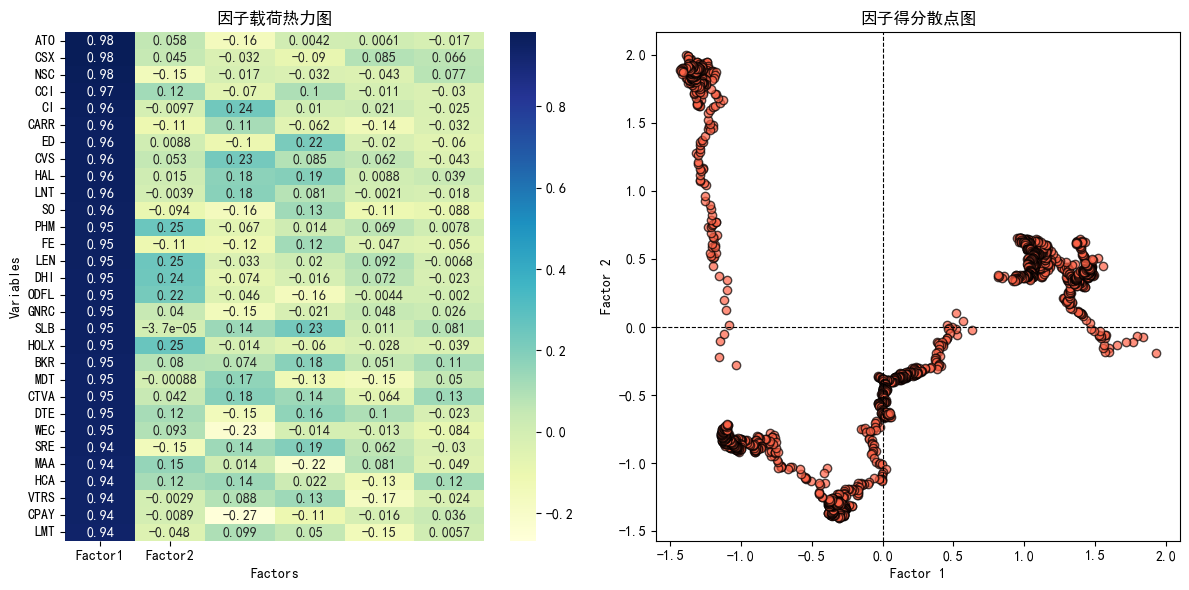

In [192]:
from sklearn.decomposition import FactorAnalysis
import seaborn as sns

#1. 数据准备
data = x_data
columns = x_data.columns

# 2. 因子分析
fa = FactorAnalysis(n_components=6, random_state=42)
fa.fit(data)

# 提取因子载荷矩阵和因子得分
factor_loadings = fa.components_.T
factor_scores = fa.transform(data)

# 3. 可视化
plt.figure(figsize=(12, 6))

# 因子载荷热力图
plt.subplot(1, 2, 1)
sort_df = pd.DataFrame(factor_loadings.T,columns=columns ).T
sort_df=sort_df.sort_values(by=[0,1], ascending=[False,False]).T
sort_df_numpy=sort_df.to_numpy().T    
sns.heatmap(sort_df_numpy[:30,:], annot=True, cmap="YlGnBu", xticklabels=["Factor1", "Factor2"], yticklabels=sort_df.columns[:30])
plt.title("因子载荷热力图")
plt.xlabel("Factors")
plt.ylabel("Variables")

# 因子得分散点图
plt.subplot(1, 2, 2)
plt.scatter(factor_scores[:, 0], factor_scores[:, 1], c="tomato", alpha=0.7, edgecolor="k")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.axvline(0, color="black", linestyle="--", linewidth=0.8)
plt.title("因子得分散点图")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")

plt.tight_layout()
plt.show()

In [110]:
Communication_Services= ['GOOGL', 'GOOG', 'T', 'CHTR', 'CMCSA', 'EA', 'FOXA', 'FOX', 'IPG', 'LYV', 'MTCH', 'META', 'NFLX', 'NWSA', 'NWS', 'OMC', 'PARA',
                         'TMUS', 'TTWO', 'VZ', 'DIS', 'WBD']
Consumer_Discretionary= ['ABNB', 'AMZN', 'APTV', 'BBY', 'BWA', 'CZR', 'KMX', 'CCL', 'CMG', 'DHI', 'DRI', 'DECK', 'DPZ', 'EBAY', 'EXPE', 'F', 'GRMN',
                         'GM', 'GPC', 'HAS', 'HLT', 'HD', 'LVS', 'LEN', 'LKQ', 'LOW', 'LULU', 'MAR', 'MCD', 'MGM', 'MHK', 'NKE', 'NCLH', 'ORLY', 'PHM', 'RL', 
                         'ROST', 'RCL', 'SBUX', 'TPR', 'TSLA', 'TJX', 'TSCO', 'ULTA', 'WYNN', 'YUM']
Consumer_Staples=['MO', 'ADM', 'BG', 'CPB', 'CHD', 'CLX', 'KO', 'CL', 'CAG', 'STZ', 'COST', 'DG', 'DLTR', 'EL', 'GIS', 'HSY', 'HRL', 'SJM', 'K', 'KVUE', 'KDP', 
                  'KMB', 'KHC', 'KR', 'LW', 'MKC', 'TAP', 'MDLZ', 'MNST', 'PEP', 'PM', 'PG', 'SYY', 'TGT', 'TSN', 'WBA', 'WMT']
Energy=['APA', 'BKR', 'CVX', 'COP', 'CTRA', 'DVN', 'FANG', 'EOG', 'EQT', 'XOM', 'HAL', 'HES', 'KMI', 'MPC', 'OXY', 'OKE', 'PSX', 'SLB', 'TRGP', 'VLO', 'WMB']
Financials=['AFL', 'ALL', 'AXP', 'AIG', 'AMP', 'AON', 'ACGL', 'AJG', 'BAC', 'BLK', 'BX', 'BK', 'BRO', 'COF', 'CBOE', 'SCHW', 'CB', 'C', 'CFG', 'CME', 'CPAY', 
            'DFS', 'FIS', 'FITB', 'FI', 'BEN', 'GPN', 'GL', 'GS', 'HIG', 'HBAN', 'ICE', 'IVZ', 'JKHY', 'JPM', 'KEY', 'KKR', 'L', 'MTB', 'MKTX', 'MMC', 'MA', 'MET',
            'MCO', 'MS', 'MSCI', 'NDAQ', 'NTRS', 'PYPL', 'PNC', 'PFG', 'PGR', 'PRU', 'RJF', 'RF', 'SPGI', 'STT', 'SYF', 'TROW', 'TRV', 'TFC', 'USB', 'V', 'WRB', 'WFC', 'WTW']
Health_Care=['ABT', 'ABBV', 'A', 'ALGN', 'AMGN', 'BAX', 'BDX', 'TECH', 'BIIB', 'BSX', 'BMY', 'CAH', 'CTLT', 'COR', 'CNC', 'CRL', 'CI', 'COO', 'CVS', 'DHR', 'DVA', 
             'DXCM', 'EW', 'ELV', 'GEHC', 'GILD', 'HCA', 'HSIC', 'HOLX', 'HUM', 'IDXX', 'INCY', 'PODD', 'ISRG', 'IQV', 'JNJ', 'LH', 'LLY', 'MCK', 'MDT', 'MRK', 
             'MRNA', 'MOH', 'PFE', 'DGX', 'REGN', 'RMD', 'RVTY', 'SOLV', 'STE', 'SYK', 'TFX', 'TMO', 'UNH', 'UHS', 'VRTX', 'VTRS', 'WAT', 'WST', 'ZBH', 'ZTS']
Industrials=['MMM', 'AOS', 'ALLE', 'AMTM', 'AME', 'ADP', 'AXON', 'BA', 'BLDR', 'CHRW', 'CARR', 'CAT', 'CTAS', 'CPRT', 'CSX', 'CMI', 'DAY', 'DE', 'DAL', 'DOV', 
             'ETN', 'EMR', 'EFX', 'EXPD', 'FAST', 'FDX', 'FTV', 'GE', 'GEV', 'GNRC', 'GD', 'HON', 'HWM', 'HII', 'IEX', 'ITW', 'IR', 'J', 'JCI', 'LHX', 'LDOS', 
             'LMT', 'MAS', 'NSC', 'NOC', 'ODFL', 'OTIS', 'PCAR', 'PH', 'PAYX', 'PAYC', 'PNR', 'PWR', 'RSG', 'ROK', 'ROL', 'RTX', 'LUV', 'SWK', 'TXT', 'TT', 'TDG', 
             'UBER', 'UNP', 'UAL', 'UPS', 'URI', 'VLTO', 'VRSK', 'WAB', 'WM', 'XYL']
Information_Technology=[ 'ACN', 'ADBE', 'AMD', 'AKAM', 'APH', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ANET', 'ADSK', 'AVGO', 'CDNS', 'CDW', 'CSCO', 'CTSH', 'GLW', 'CRWD',
                        'DELL', 'ENPH', 'EPAM', 'FFIV', 'FSLR', 'FTNT', 'IT', 'GEN', 'GDDY', 'HPE', 'HPQ', 'IBM', 'INTC', 'INTU', 'JBL', 'JNPR', 'KEYS', 'KLAC', 
                        'LRCX', 'MCHP', 'MU', 'MSFT', 'MPWR', 'MSI', 'NTAP', 'NVDA', 'NXPI', 'ON', 'ORCL', 'PLTR', 'PANW', 'PTC', 'QRVO', 'QCOM', 'ROP', 'CRM', 
                        'STX', 'NOW', 'SWKS', 'SMCI', 'SNPS', 'TEL', 'TDY', 'TER', 'TXN', 'TRMB', 'VRSN', 'WDC', 'ZBRA']
Materials=['APD', 'ALB', 'AMCR', 'AVY', 'BALL', 'CE', 'CF', 'CTVA', 'DOW', 'DD', 'EMN', 'ECL', 'FMC', 'FCX', 'IFF', 'IP', 'LIN', 'LYB', 'MLM', 'MOS', 'NEM', 'NUE',
           'PKG', 'PPG', 'SHW', 'SW', 'STLD', 'VMC']
Real_Estate=['ARE', 'AMT', 'AVB', 'BXP', 'CPT', 'CBRE', 'CSGP', 'CCI', 'DLR', 'EQIX', 'EQR', 'ESS', 'EXR', 'FRT', 'DOC', 'HST', 'INVH', 'IRM', 'KIM', 'MAA', 'PLD', 
             'PSA', 'O', 'REG', 'SBAC', 'SPG', 'UDR', 'VTR', 'VICI', 'WELL', 'WY']
Utilities=['AES', 'LNT', 'AEE', 'AEP', 'AWK', 'ATO', 'CNP', 'CMS', 'ED', 'CEG', 'D', 'DTE', 'DUK', 'EIX', 'ETR', 'EVRG', 'ES', 'EXC', 'FE', 'NEE', 'NI', 'NRG',
           'PCG', 'PNW', 'PPL', 'PEG', 'SRE', 'SO', 'VST', 'WEC', 'XEL']
Industry={'Communication_Services':Communication_Services,'Consumer_Discretionary':Consumer_Discretionary,
          'Consumer_Staples':Consumer_Staples,'Energy':Energy, 
          'Financials':Financials,'Health_Care':Health_Care,'Industrials':Industrials,
          'Information_Technology':Information_Technology,'Materials':Materials,
          'Real_Estate':Real_Estate,'Utilities':Utilities}
industry_dict=Industry
# 计算最长的列表长度
max_length = max(len(lst) for lst in industry_dict.values())

# 填充 NaN 以使所有列表长度相同
for key in industry_dict:
    industry_dict[key] += [np.nan] * (max_length - len(industry_dict[key]))

# 转换为 DataFrame
df_industries = pd.DataFrame(industry_dict)
# 函数：根据公司名称查找行业
def find_company_industry(company_name, industry_dict):
    for industry, companies in industry_dict.items():
        if company_name in companies:
            return industry
    return None



#因子1的行业占比
sort_df = pd.DataFrame(factor_loadings.T,columns=columns ).T
sort_df=sort_df.sort_values(by=[0,1], ascending=[False,False]).T
sort_df_numpy=sort_df.to_numpy().T   
columns1=sort_df.columns[:30]

# 检索每个公司的行业
company_industry_map = {company: find_company_industry(company, industry_dict) for company in columns1}

# 输出结果
for company, industry in company_industry_map.items():
    print(f"公司 {company} 所在行业: {industry}")


公司 ATO 所在行业: Utilities
公司 CSX 所在行业: Industrials
公司 NSC 所在行业: Industrials
公司 CCI 所在行业: Real_Estate
公司 ED 所在行业: Utilities
公司 CI 所在行业: Health_Care
公司 PHM 所在行业: Consumer_Discretionary
公司 SO 所在行业: Utilities
公司 DHI 所在行业: Consumer_Discretionary
公司 LEN 所在行业: Consumer_Discretionary
公司 CARR 所在行业: Industrials
公司 CVS 所在行业: Health_Care
公司 LNT 所在行业: Utilities
公司 FE 所在行业: Utilities
公司 HAL 所在行业: Energy
公司 ODFL 所在行业: Industrials
公司 GNRC 所在行业: Industrials
公司 HOLX 所在行业: Health_Care
公司 WEC 所在行业: Utilities
公司 DTE 所在行业: Utilities
公司 BKR 所在行业: Energy
公司 SLB 所在行业: Energy
公司 MAA 所在行业: Real_Estate
公司 CTVA 所在行业: Materials
公司 MDT 所在行业: Health_Care
公司 CPAY 所在行业: Financials
公司 SRE 所在行业: Utilities
公司 HCA 所在行业: Health_Care
公司 NUE 所在行业: Materials
公司 LMT 所在行业: Industrials


## <span style="font-size: 24px;"> 独立成分分析 </span>

Text(0.5, 1.0, '股票A')

Text(0.5, 1.0, '股票B')

Text(0.5, 1.0, '提取特征A')

Text(0.5, 1.0, '提取特征B')

Text(0.5, 0.98, 'Independent Component Analysis (ICA) Results')

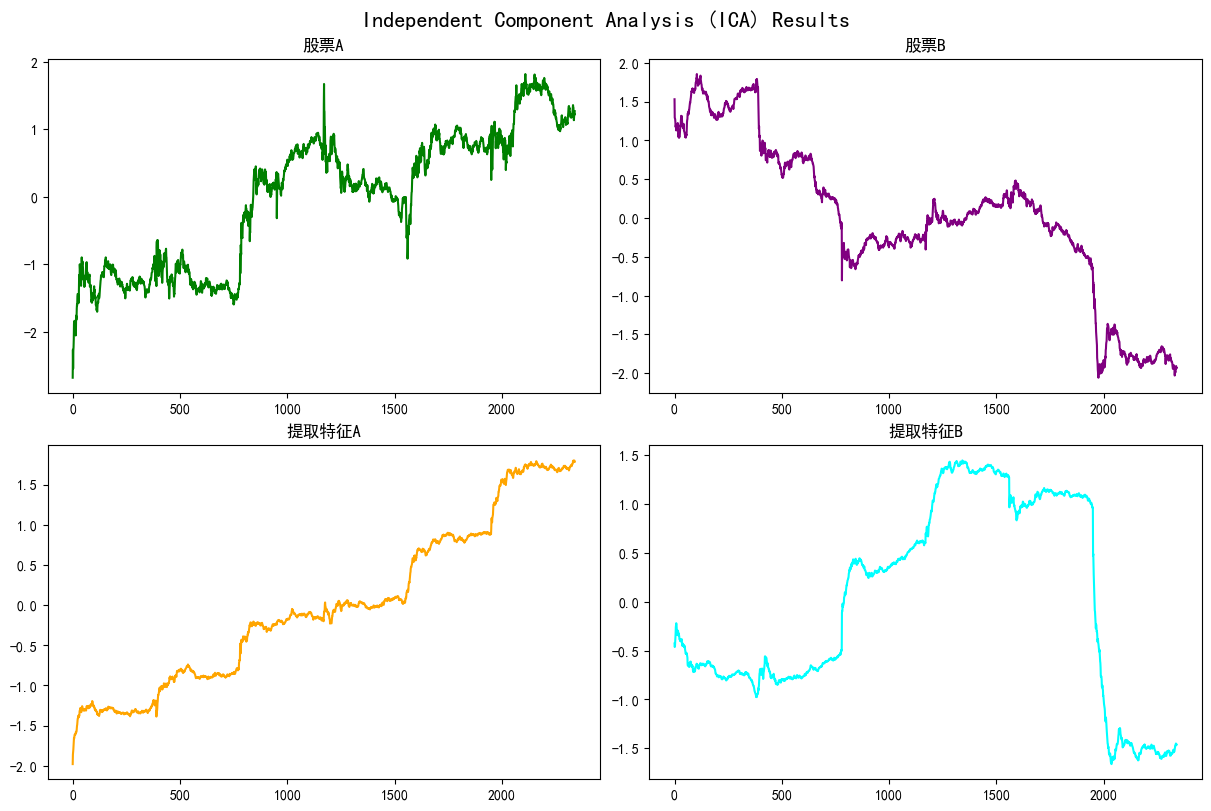

In [194]:
from sklearn.decomposition import FastICA

# 数据准备
X = x_data.to_numpy()  # 观测信号
time=np.arange(len(X))

#  应用 ICA
ica = FastICA(n_components=2, random_state=42)
S_estimated = ica.fit_transform(X)  # 分离出的信号
A_estimated = ica.mixing_  # 估计的混合矩阵

# 绘图分析
fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)


# 混合信号
axes[0, 0].plot(time, X[:, 0], color='green')
axes[0, 0].set_title('股票A')
axes[0, 1].plot(time, X[:, 99], color='purple')
axes[0, 1].set_title('股票B')

# 分离信号
axes[1, 0].plot(time, S_estimated[:, 0], color='orange')
axes[1, 0].set_title('提取特征A')
axes[1, 1].plot(time, S_estimated[:, 1], color='cyan')
axes[1, 1].set_title('提取特征B')

plt.suptitle('Independent Component Analysis (ICA) Results', fontsize=16)
plt.show()

## <span style="font-size: 24px;"> 多维尺度分析 </span>

C:\Users\cqm\AppData\Local\Temp\ipykernel_30380\2286233253.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax[0].scatter(low_dim_data[:, 0], low_dim_data[:, 1], cmap='viridis', s=50, edgecolor='k')


Text(0.5, 1.0, 'MDS Projection (2D)')

Text(0.5, 0, 'Component 1')

Text(0, 0.5, 'Component 2')

Text(0.5, 1.0, 'Distance Matrix Heatmap')

Text(0.5, 0, 'Sample Index')

Text(0, 0.5, 'Sample Index')

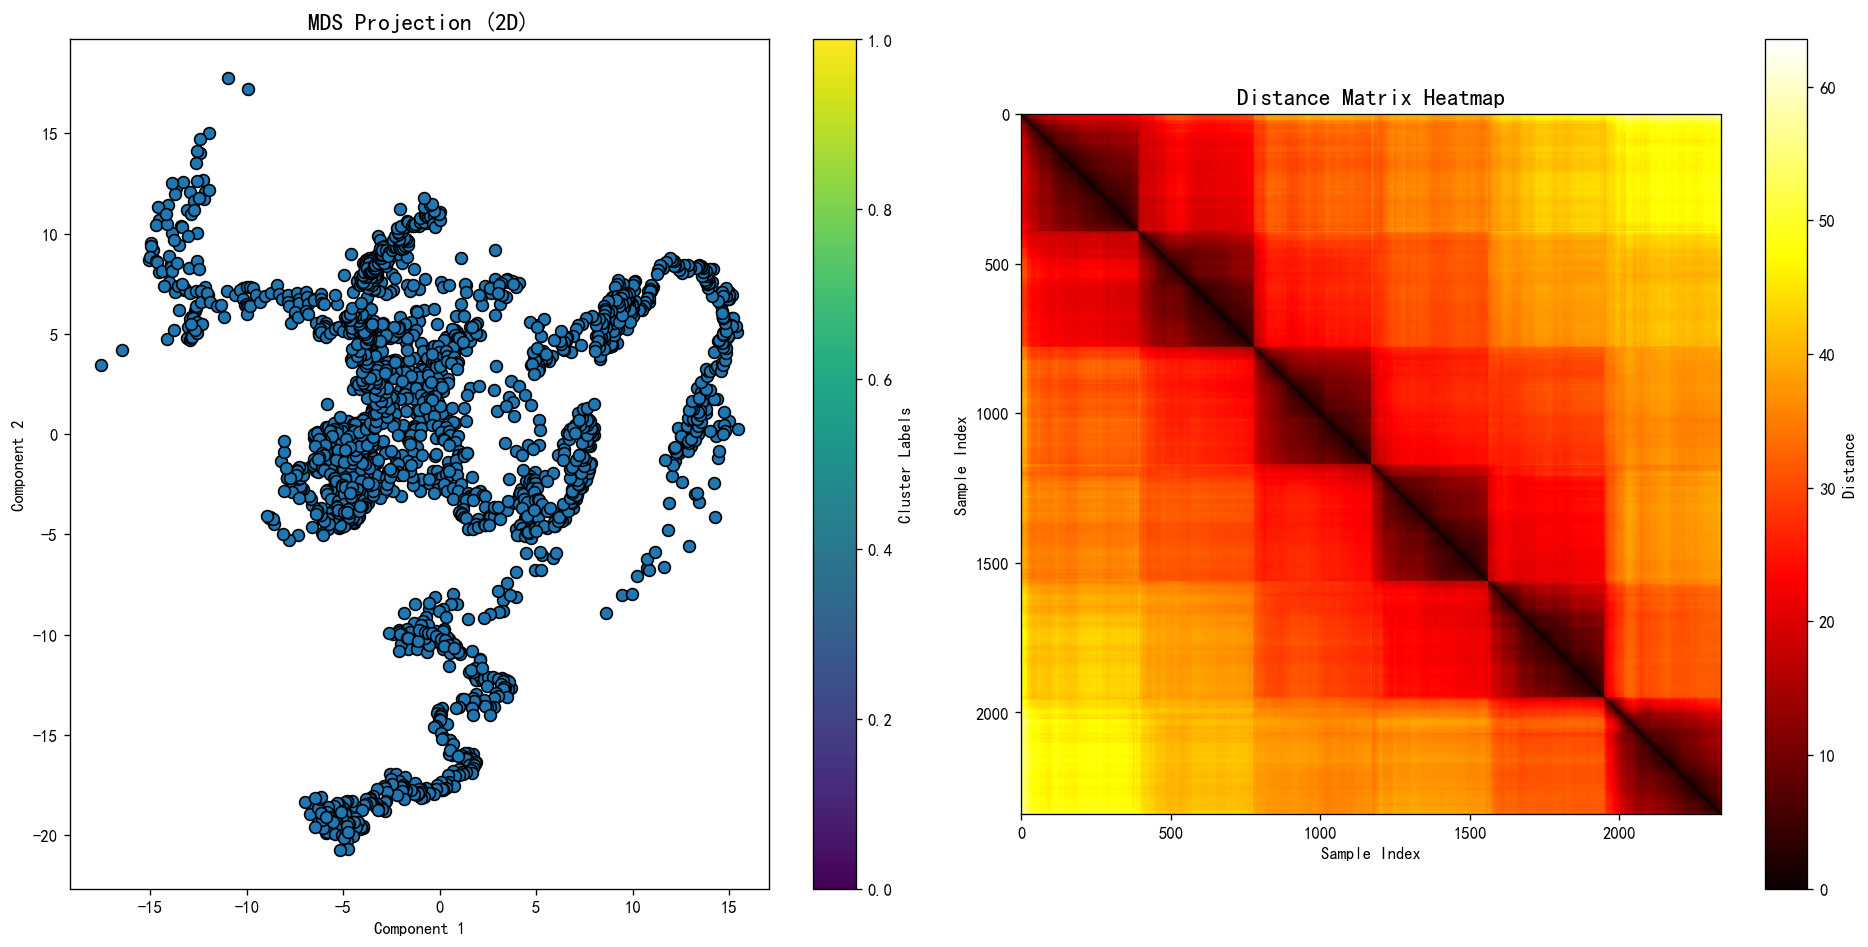

In [196]:
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
data=x_data

distance_matrix = pairwise_distances(data, metric='euclidean')
# MDS降维
mds = MDS(n_components=6, dissimilarity='precomputed', random_state=42)
low_dim_data = mds.fit_transform(distance_matrix)

# 绘图
fig, ax = plt.subplots(1, 2, figsize=(16, 8), dpi=120)

# 图1：MDS降维后的散点图
scatter = ax[0].scatter(low_dim_data[:, 0], low_dim_data[:, 1], cmap='viridis', s=50, edgecolor='k')
ax[0].set_title("MDS Projection (2D)", fontsize=14)
ax[0].set_xlabel("Component 1")
ax[0].set_ylabel("Component 2")
plt.colorbar(scatter, ax=ax[0], label="Cluster Labels")

# 图2：距离矩阵的热力图
im = ax[1].imshow(distance_matrix, cmap='hot', interpolation='nearest')
ax[1].set_title("Distance Matrix Heatmap", fontsize=14)
ax[1].set_xlabel("Sample Index")
ax[1].set_ylabel("Sample Index")
plt.colorbar(im, ax=ax[1], label="Distance")

plt.tight_layout()
plt.show()

## <span style="font-size: 24px;"> t-SNE </span>

c:\anaconda\envs\pytorch\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\cqm\AppData\Local\Temp\ipykernel_30380\647746706.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax1.scatter(X_pca1[:, 0], X_pca1[:, 1], X_pca1[:, 2], cmap='rainbow', s=10)


Text(0.5, 0.92, 'PCA 3D Visualization')

Text(0.5, 0, 'PCA1')

Text(0.5, 0.5, 'PCA2')

Text(0.5, 0, 'PCA3')

c:\anaconda\envs\pytorch\lib\site-packages\matplotlib\collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


C:\Users\cqm\AppData\Local\Temp\ipykernel_30380\647746706.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='rainbow', s=10)


Text(0.5, 1.0, 't-SNE 2D Visualization')

Text(0.5, 0, 't-SNE1')

Text(0, 0.5, 't-SNE2')

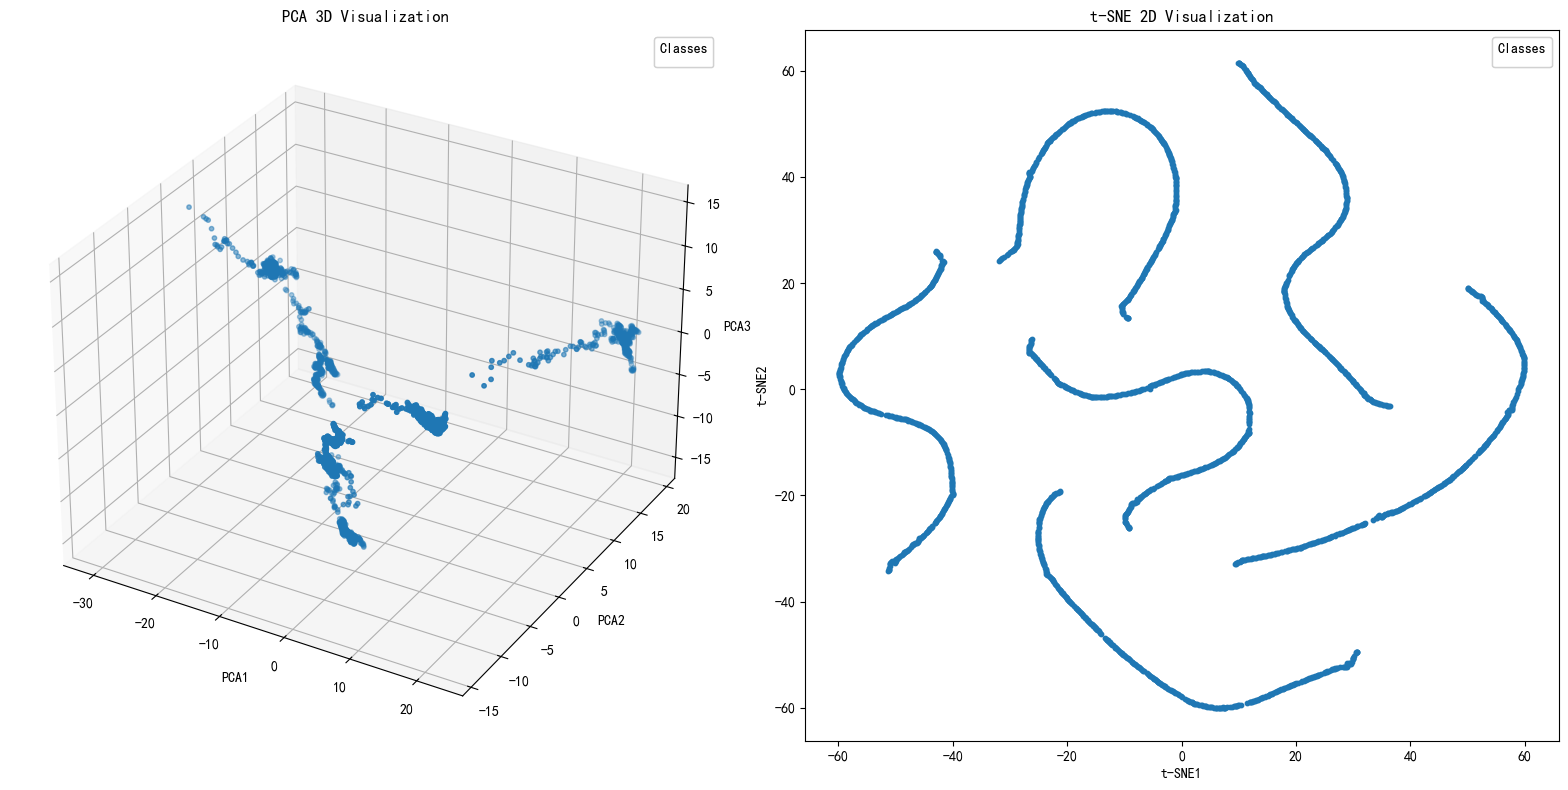

In [200]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

X=x_data

# 使用PCA降维到3D空间（便于对比）
pca = PCA(n_components=3)
X_pca1 = pca.fit_transform(X)

# 使用t-SNE降维到2D空间
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

fig = plt.figure(figsize=(16, 8))

# 原始PCA 3D降维
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
scatter = ax1.scatter(X_pca1[:, 0], X_pca1[:, 1], X_pca1[:, 2], cmap='rainbow', s=10)
ax1.set_title('PCA 3D Visualization')
ax1.set_xlabel('PCA1')
ax1.set_ylabel('PCA2')
ax1.set_zlabel('PCA3')
legend1 = ax1.legend(*scatter.legend_elements(), title="Classes", loc="best")
ax1.add_artist(legend1)

# t-SNE 2D降维
ax2 = fig.add_subplot(1, 2, 2)
scatter = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='rainbow', s=10)
ax2.set_title('t-SNE 2D Visualization')
ax2.set_xlabel('t-SNE1')
ax2.set_ylabel('t-SNE2')
legend2 = ax2.legend(*scatter.legend_elements(), title="Classes", loc="best")
ax2.add_artist(legend2)

plt.tight_layout()
plt.show()

UMAP

c:\anaconda\envs\pytorch\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\cqm\AppData\Local\Temp\ipykernel_30380\3946075921.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = axs[0].scatter(embedding[:, 0], embedding[:, 1],  cmap='Spectral', s=5)


Text(0.5, 1.0, 'UMAP 2D Embedding')

Text(0.5, 0, 'UMAP1')

Text(0, 0.5, 'UMAP2')

<Axes: >

Text(0.5, 1.0, 'Density of UMAP Embedding')

Text(0.5, 0, 'UMAP1')

Text(0, 0.5, 'UMAP2')

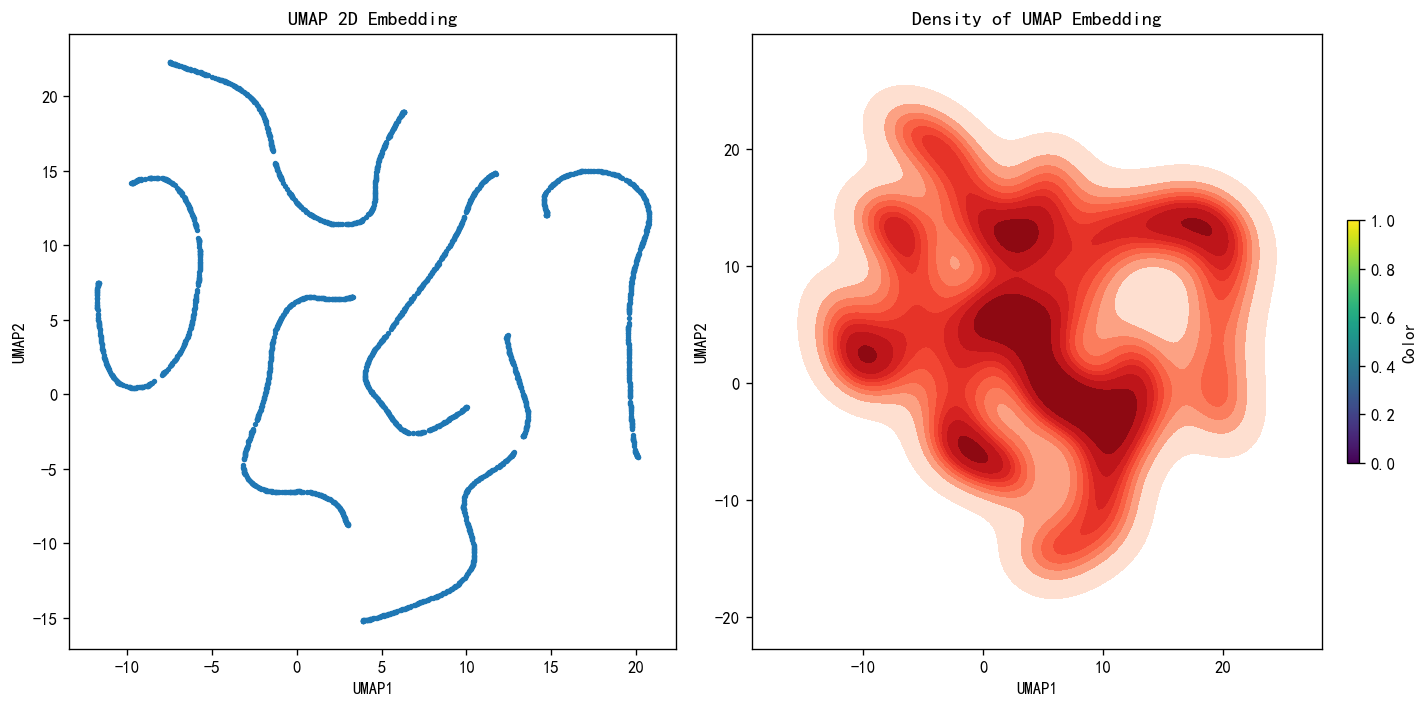

In [207]:

import umap
# 第一步：生成数据集
X=x_data.to_numpy()

# 第二步：应用 UMAP 进行降维

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(X)

# 第三步：可视化
fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=120)

#  UMAP 2D 嵌入
scatter = axs[0].scatter(embedding[:, 0], embedding[:, 1],  cmap='Spectral', s=5)
axs[0].set_title("UMAP 2D Embedding")
axs[0].set_xlabel("UMAP1")
axs[0].set_ylabel("UMAP2")

# UMAP 嵌入的密度图
sns.kdeplot(x=embedding[:, 0], y=embedding[:, 1], cmap="Reds", fill=True, ax=axs[1])
axs[1].set_title("Density of UMAP Embedding")
axs[1].set_xlabel("UMAP1")
axs[1].set_ylabel("UMAP2")

# 为 UMAP 图添加颜色条
cbar = fig.colorbar(scatter, ax=axs[1], orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label("Color")

plt.tight_layout()
plt.show()

KPCA

<Axes: >

C:\Users\cqm\AppData\Local\Temp\ipykernel_30380\2229412370.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_kpca[:, 0], X_kpca[:, 1], cmap='plasma', edgecolor='k')


Text(0.5, 1.0, 'Kernel PCA Projection')

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

<Axes: >

Text(0.5, 1.0, 'Cumulative Variance Ratio')

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Cumulative Variance')

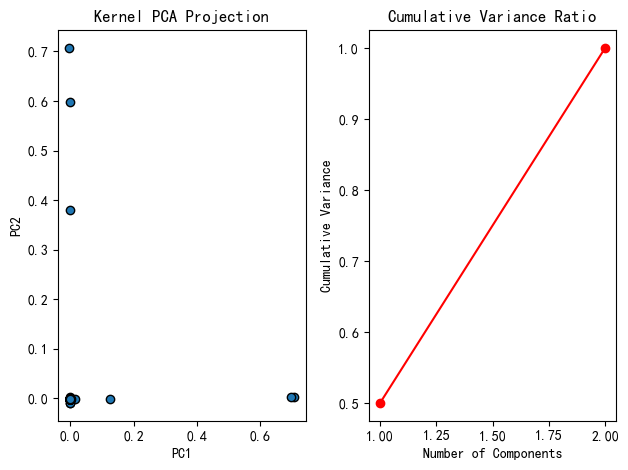

In [208]:
from sklearn.decomposition import KernelPCA


X=x_data.to_numpy()

# 核PCA降维
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=15,fit_inverse_transform=True)
X_kpca = kernel_pca.fit_transform(X)

#投影后数据可视化
plt.subplot(1, 2, 1)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], cmap='plasma', edgecolor='k')
plt.title('Kernel PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')

# 核PCA没有显式的解释方差，因此直接基于特征值来估计
lambdas = kernel_pca.eigenvalues_
explained_variance_ratio = lambdas / np.sum(lambdas)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', color='red')
plt.title('Cumulative Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

# 总体展示
plt.tight_layout()
plt.show()

自编码器

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Epoch 10/100, Loss: 0.9969


Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Epoch 20/100, Loss: 0.8073


Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Epoch 30/100, Loss: 0.5334


Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Epoch 40/100, Loss: 0.3568


Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Epoch 50/100, Loss: 0.3023


Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Epoch 60/100, Loss: 0.2743


Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Epoch 70/100, Loss: 0.2501


Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Epoch 80/100, Loss: 0.2236


Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Epoch 90/100, Loss: 0.1968


Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Epoch 100/100, Loss: 0.1740


Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=482, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=482, bias=True)
  )
)

Text(0.5, 1.0, '原始数据和重构后的数据')

Text(0.5, 1.0, '潜在空间分布')

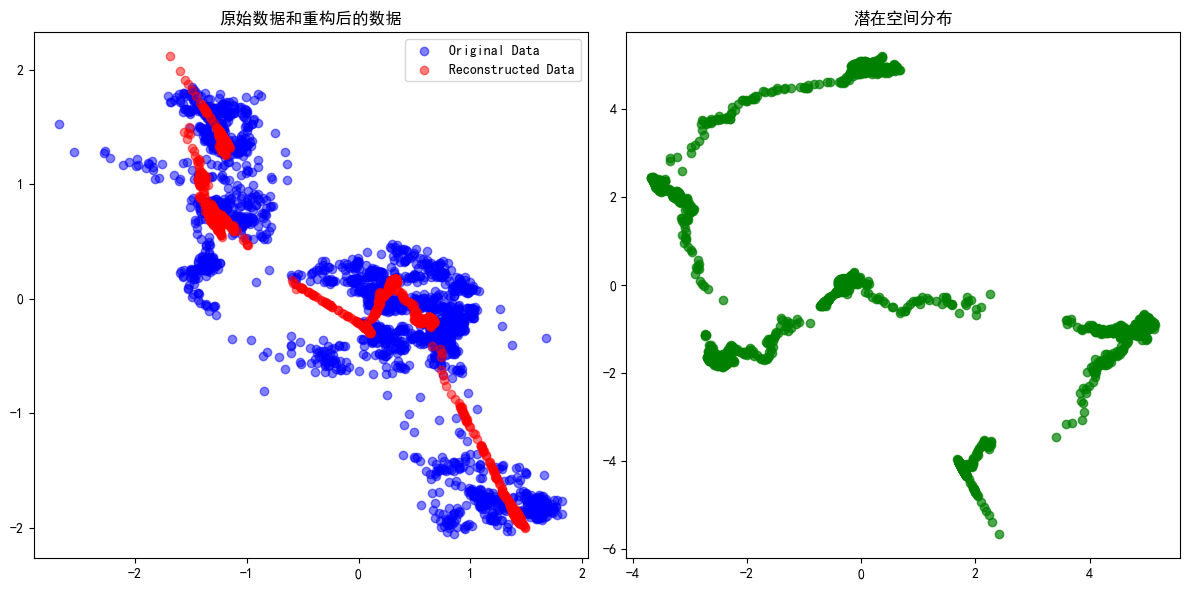

In [228]:
import torch
import torch.nn as nn
import torch.optim as optim

data = torch.tensor(x_data.to_numpy(), dtype=torch.float32)

# 2. 定义自编码器
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        # 编码器
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 8),
            nn.ReLU(),
            nn.Linear(8, latent_dim),
        )
        # 解码器
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 8),
            nn.ReLU(),
            nn.Linear(8, input_dim),
        )
    
    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return x_hat, z

# 3. 初始化模型
input_dim = 482
latent_dim = 2
model = Autoencoder(input_dim, latent_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 4. 训练模型
epochs = 100
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    x_hat, z = model(data)
    loss = criterion(x_hat, data)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# 5. 可视化分析
model.eval()
with torch.no_grad():
    x_hat, z = model(data)

# 创建子图
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 图1：原始数据 vs 重建数据
axs[0].scatter(data[:, 0], data[:, 99], color='blue', alpha=0.5, label='Original Data')
axs[0].scatter(x_hat[:, 0], x_hat[:, 99], color='red', alpha=0.5, label='Reconstructed Data')
axs[0].set_title('原始数据和重构后的数据')
axs[0].legend()
axs[0].grid(False)

# 图2：潜在空间分布
axs[1].scatter(z[:, 0], z[:, 1], color='green', alpha=0.7)
axs[1].set_title('潜在空间分布')
axs[1].grid(False)

plt.tight_layout()
plt.show()

In [135]:
z.shape

torch.Size([2340, 2])

# 比较各种方法下特征与y的xicor相关系数

In [172]:
def reduction_xicor(x,y):
    x=np.array(x);y=np.array(y)
    p=x.shape[1];rho=[]
    for i in range(p):
        rho.append(max(Xi(list(x[:,i]),list(y)).correlation,Xi(list(y),list(x[:,i])).correlation))
    return rho

In [217]:
def reduction_pearsonr(x,y):
    x=np.array(x);y=np.array(y)
    p=x.shape[1];rho=[]
    for i in range(p):
        rho.append(pearsonr(x[:,i],y)[0])
    return rho

In [203]:
reduction_xicor(X_pca,y_data)

[0.7459004048727824,
 0.7481674245395772,
 0.5584143721635395,
 0.4331119547901775,
 0.30003493681695825,
 0.4064567182512817]

In [218]:
reduction_pearsonr(X_pca,y_data)

[0.7083096789491002,
 -0.6320078786457969,
 -0.037307291010294424,
 0.0923318900143941,
 0.14906052044247192,
 0.19183080659713656]

In [204]:
reduction_xicor(factor_scores,y_data)

[0.7484501171804825,
 0.7617224271001951,
 0.5827116950785585,
 0.5674030120072084,
 0.38946990871553455,
 0.3844826839949381]

In [219]:
reduction_pearsonr(factor_scores,y_data)

[-0.7343696011917709,
 -0.6092612746411366,
 0.0542417977173028,
 -0.0623710314881693,
 -0.12528733045690876,
 0.18332668381712192]

In [195]:
ica = FastICA(n_components=6, random_state=42)
S_estimated1 = ica.fit_transform(X)  # 分离出的信号
reduction_xicor(S_estimated1,y_data)

[0.4414496021348532,
 0.42401534517045536,
 0.3039451939413387,
 0.7065951707078415,
 0.5546470806207686,
 0.3306891173002259]

In [220]:
reduction_pearsonr(S_estimated1,y_data)

[0.2972723875824521,
 0.07324544942087362,
 0.38351719475898216,
 -0.8161480348066641,
 -0.18469031486676912,
 0.1704181486629671]

In [201]:
reduction_xicor(low_dim_data,y_data)

[0.5367208226899011,
 0.4674407311419262,
 0.4466205432501539,
 0.7051943081442855,
 0.450000995324895,
 0.340893480329732]

In [221]:
reduction_pearsonr(low_dim_data,y_data)

[0.6005599523194682,
 0.13558474452281036,
 -0.07688185949302231,
 -0.8578777562439068,
 -0.07554015165043973,
 0.02540276577731806]

In [202]:
tsne1 = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
X_tsne1 = tsne1.fit_transform(X)
reduction_xicor(X_tsne1,y_data)

c:\anaconda\envs\pytorch\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[0.48284178589410953, 0.46828611810324317, 0.36653752565520215]

In [222]:
reduction_pearsonr(X_tsne1,y_data)

[0.6122914509078293, -0.4863056001563527, 0.006704770922268464]

In [210]:
reducer1 = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=6, random_state=42)
embedding1 = reducer1.fit_transform(X)
reduction_xicor(embedding1,y_data)

c:\anaconda\envs\pytorch\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[0.758938233299651,
 0.4563471503300368,
 0.38572309623111556,
 0.34759302132972125,
 0.34411504567810747,
 0.34324007291257097]

In [223]:
reduction_pearsonr(embedding1,y_data)

[-0.6084088004336915,
 -0.15193324811513242,
 0.1299335100577593,
 -0.020454157224254456,
 0.16963724734130026,
 -0.10434447647008584]

In [211]:
kernel_pca1 = KernelPCA(n_components=6, kernel='rbf', gamma=15,fit_inverse_transform=True)
X_kpca1 = kernel_pca1.fit_transform(X)
reduction_xicor(X_kpca1,y_data)

[0.26596907307594597,
 0.2773929809280544,
 0.27674134160613006,
 0.2846975720741751,
 0.2618489896450399,
 0.2733491096369587]

In [224]:
reduction_pearsonr(X_kpca1,y_data)

[-0.034943145721764504,
 -0.03150887538542018,
 0.025142330088421656,
 -0.02199287558944993,
 -0.024738561667554088,
 -0.043182417360195686]

In [227]:
reduction_xicor(z,y_data)

[0.6328036257682754,
 0.6473454319792227,
 0.6354453775404563,
 0.7953190230515058,
 0.6747451331658447,
 0.7394576423591268]

In [226]:
reduction_pearsonr(z,y_data)

[0.4464784643900447,
 0.7340306549811457,
 0.7267903125083403,
 -0.7457705131219041,
 -0.7375254950328844,
 0.8882634058457526]

In [24]:
#导出依赖包
import pipreqs
!pipreqs  --encoding=utf8

INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in c:\Users\cqm\Desktop\多元统计陈麒名\requirements.txt
